In [1]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u
from astropy.coordinates import SkyCoord
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from matplotlib import pyplot as plt
from roman_imsim.utils import roman_utils
from roman_imsim import *
import astropy.table as tb
import warnings 
from astropy.utils.exceptions import AstropyWarning
from erfa import ErfaWarning
warnings.simplefilter('ignore', category=AstropyWarning)
warnings.filterwarnings("ignore", category=ErfaWarning)
import scipy.sparse as sp 
from scipy.linalg import block_diag, lstsq
from numpy.linalg import LinAlgError
from astropy.nddata import Cutout2D
from coord import *
import requests
from astropy.table import Table
import os
import scipy
import time
import galsim

import sklearn
from sklearn import linear_model
from scipy.interpolate import RectBivariateSpline

roman_path = '/hpc/group/cosmology/OpenUniverse2024'
sn_path = '/hpc/group/cosmology/OpenUniverse2024/roman_rubin_cats_v1.1.2_faint/'

'''
Cole Meldorf 2024
Adapted from code by Pedro Bernardinelli

                    ___                         
                   / _ \___  __ _  ___ ____     
                  / , _/ _ \/  ' \/ _ `/ _ \    
                 /_/|_|\___/_/_/_/\_,_/_//_/    
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣔⣴⣦⣔⣠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣼⣿⣭⣿⣟⣿⣿⣿⣅⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣾⣷⣾⣿⣿⣿⣿⣿⣿⣿⡶⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣄⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠄⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⣠⠤⢤⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⡠⢒⣿⣿⣿⣠⠋⠀⠀⠀⠀⠀⠀⣀⣀⠤⠶⠿⠿⠛⠿⠿⠿⢻⢿⣿⣿⣿⠿⠟⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⡞⢀⣿⣿⣿⡟⠃⠀⠀⠀⣀⡰⠶⠛⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠀⠃⠘⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠘⢧⣤⣈⣡⣤⠤⠴⠒⠊⠉⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀


                 _____  __     ___  __________
                / __/ |/ /    / _ \/  _/_  __/
               _\ \/    /    / ___// /  / /   
              /___/_/|_/    /_/  /___/ /_/    
                                
                                                        
'''

from AllASPFuncs import *

In [3]:
simulateImages(10,5,7.541534306163982, -44.219205940734625, True, True, [0, 100, 1000, 10**4, 10**5], 0, False, 'F184', size=11)

GalSimError: Could not locate fiducial wavelength where SED * Bandpass is nonzero.

In [3]:
assert False

(10535, 14)

In [22]:
def test_findAllExposures():
    explist = findAllExposures(50134575, 7.731890048839705, -44.4589649005717,62654.,62958.,62683.98, 'Y106', maxbg = 24, maxdet = 24, \
                        return_list = True, stampsize = 25, roman_path = roman_path,\
                    pointing_list = None, SCA_list = None, truth = 'simple_model')
    compare_table = ascii.read('tests/testdata/findallexposurestest.dat') 
    assert explist['Pointing'].all() == compare_table['Pointing'].all()
    assert explist['SCA'].all() == compare_table['SCA'].all()
    assert explist['date'].all() == compare_table['date'].all()

test_findAllExposures()
    

filter Pointing SCA    date    ... true mag true flux realized flux BAND
------ -------- --- ---------- ... -------- --------- ------------- ----
  Y106     7862   1  62100.665 ...       --        --            -- Y106
  Y106     6703   1 62085.6436 ...       --        --            -- Y106
  Y106     3209   1 62040.4928 ...       --        --            -- Y106
  Y106     5154   1 62065.5962 ...       --        --            -- Y106
  Y106     2819   2  62035.467 ...       --        --            -- Y106
  Y106     1653   3  62020.411 ...       --        --            -- Y106
  Y106     3989   4 62050.5445 ...       --        --            -- Y106
  Y106     7857   5  62100.639 ...       --        --            -- Y106
  Y106     6318   6 62080.6436 ...       --        --            -- Y106
  Y106     1268   7  62015.411 ...       --        --            -- Y106
   ...      ... ...        ... ...      ...       ...           ...  ...
  Y106     6313   8 62080.6178 ...       --        

In [13]:
from astropy.io import ascii
ascii.write(explist, 'findallexposurestest.dat', overwrite=True) 

In [2]:
biases = []
stds = []


roman_bandpasses = galsim.roman.getBandpasses()


###################### BEGIN TEST PARAMETERS #######################
band = 'Y106'
npoints = 7
size = 11     #Stampsize of the image used
testnum = 2 #Total number of images
detim = 1  #Number of images with a supernova

use_real_images = True
use_roman = True   #Use a Roman PSF

# These are only for my simulated images # 
#These 5 options are a sanity check. If flipped all to true, the code should be able to perfectly recover the input.
check_perfection = False   
make_exact = False                            
avoid_non_linearity = False         #The PSF does not scale perfectly linearly. This cheats by making the SN model point have a flux equal to that of the 
                                    #SN, rather than giving it a flux of 1 and scaling the SN flux by the fit value. Therfore a perfect fit will recover
                                    # a value of 1.00000
deltafcn_profile = False            #This is a check to see if the code can recover the input when the input is a delta function.
single_grid_point = False           #This cheats and makes the grid only one point, which is the location of the bg galaxy.

#PSF for when not using the Roman PSF:
lam = 1293  # nm
lam_over_diam = 0.11300864172775239   #This is the roman value
airy = galsim.ChromaticOpticalPSF(lam, diam = 2.36, aberrations=galsim.roman.getPSF(1,band, pupil_bin = 1).aberrations)


do_xshift = True    #whether to shift the images in the x direction (they will still be centered on the same point, this is just to emulate\
        #Roman taking a series of images at different locations.)
do_rotation = True #whether to rotate the images
noise = 30 #Standard Deviation of noise to add to a simulated image. 
background_level = 0  #mean of the noise to add to the image
if detim == 0:
    supernova = 0
else:
    d = np.linspace(5,20,detim)
    mags = -5 * np.exp(-d/10) + 6
    fluxes = 10**(mags)
    supernova = list(fluxes)   #This is my faux lightcurve, you can edit this if you want to test with a different lightcurve.
#########################################

method = 'lsqr'  #The method to use to fit the images. Currently only 'lsqr' is supported.
make_initial_guess = True  #Make an initial guess for the grid point values by averaging over pixels
adaptive_grid = True      #Use my new adaptive grid method rather than a static evenly spaced grid. Bizarrely, this seems to be worse
                            #when just fitting background, but gives better results when fitting for the supernova flux.
spline_grid = False

fit_background = False    #If true, each image will have a new parameter introduced with it that fits for the background. If False
                            #the background will be subtracted from the images before fitting based on the background level over the whole image.
                            #So far, I've found keeping this to be False is better.

weighting = True #Apply a weighting to the fit. Currently, this is a tophat of radius 4 pix around the SN location and a 2D gaussian of width 2.5.

pixel = True  #Use a tophat profile to be convolved with the PSF, rather than delta functions. This does not seem to make a huge difference.


if make_exact:
    assert single_grid_point
if avoid_non_linearity:
    assert deltafcn_profile
assert detim <= testnum
if type(supernova) == 'list':
    assert len(supernova) == detim


galsim.roman.roman_psfs._make_aperture.clear() #clear cache

sed = galsim.SED(galsim.LookupTable([100, 2600], [1,1], interpolant='linear'),
                                wave_type='nm', flux_type='fphotons')

###################### END TEST PARAMETERS #######################

################### Finding and Preparing Images Section #########


for ID in [30666595]:
    #50134575, 50022453, 40018655, 20055347, 50027278, 50144007, 40084671, \
    #50070195, 50071618, 40120913, 50065247, 50061540, 60144043, 50118342, 50119066,\
    #     50123776, 50049302, 50010393, 40096456, 50093469, 50099064, 20170506, 30666595,30201096
    print('ID:', ID)

    #check if file exists

    #if os.path.exists(f'./results/{ID}_{band}_detections.csv'):
        #print('File exists, skipping')
        #continue

    #try:

    psf_matrix = []
    imagelist = []

    sn_matrix = []
    cutout_wcs_list = []
    im_wcs_list = []
    gridmade = False

    #This is a catch for when I'm doing my own simulated WCS's
    image = None
    util_ref = None

    '''
    for p1 in [30, 35]:
        for p2 in [75, 80, 85]:
            for p3 in [85, 90, 95]:
    '''
    #percentiles = [35, 85, 85]
    percentiles = []
    psf_matrix = []
    imagelist = []

    sn_matrix = []
    cutout_wcs_list = []
    im_wcs_list = []


    if use_real_images:
        #Find SN Info, find exposures containig it, and load those as images. 
        images, cutout_wcs_list, im_wcs_list, err, snra, sndec, ra, dec, exposures = fetchImages(testnum, detim, ID, sn_path, band, size, fit_background)
        if len(exposures) != testnum:
                print('Not enough exposures')
                continue
        imlist = [images[i*size**2:(i+1)*size**2].reshape(size,size) for i in range(testnum)]

    else:
        #Simulate the images of the SN and galaxy.
        ra, dec = 7.541534306163982, -44.219205940734625
        snra = ra
        sndec = dec
        galra = ra + 1.5e-5
        galdec = dec + 1.5e-5


        images, im_wcs_list, cutout_wcs_list = simulateImages(testnum,detim,ra,dec,do_xshift,\
            do_rotation,supernova,noise = noise,use_roman=use_roman, size = size, band = band)
        imlist = [images[i*size**2:(i+1)*size**2].reshape(size,size) for i in range(testnum)]


    #If not using the adaptive grid, make a grid of points to fit over.
    ra_grid, dec_grid = makeGrid(adaptive_grid, images,size,ra,dec,cutout_wcs_list, single_grid_point=single_grid_point, percentiles=percentiles, npoints = npoints)

    if weighting:
        wgt_matrix = getWeights(cutout_wcs_list,size,snra,sndec, error = None)
    
    #Using the images, hazard an initial guess.
    if make_initial_guess and testnum - detim != 0:
        if supernova != 0:
            x0test = generateGuess(imlist[:-detim], cutout_wcs_list, ra_grid, dec_grid)
            x0test = np.concatenate([x0test, np.full(testnum, 3000)], axis = 0)
            print('setting initial guess to 3000')
        else:
            x0test = generateGuess(imlist, cutout_wcs_list, ra_grid, dec_grid)

    else:
        x0test = None

    ############################################### Fitting Section ###############################################


    #Calculate the Confusion Metric
    if use_real_images:
        x,y = im_wcs_list[0].toImage(ra,dec, units = 'deg')
        snx, sny = cutout_wcs_list[0].toImage(snra, sndec, units = 'deg')
        pointing = exposures['Pointing'][0]
        SCA = exposures['SCA'][0]
        array = construct_psf_source(x, y, pointing, SCA, \
                        stampsize = size, x_center = snx, y_center = sny, sed = sed)
        confusion_metric = np.dot(images[:size**2], array)
        print('Confusion Metric:', confusion_metric)




    #Build the backgrounds loop
    print('\n')
    for i in range(testnum):
        spinner = ['|', '/', '-', '\\']
        print('Constructing Model ' + str(i) + '   ' + spinner[i%4], end = '\r')
        if use_roman:
            sim_psf = galsim.roman.getPSF(1,band, pupil_bin=8, wcs = cutout_wcs_list[i])
        else:
            sim_psf = airy

        x,y = im_wcs_list[i].toImage(ra,dec, units = 'deg')

        #Build the model for the background using the correct psf and the grid we made in the previous section. 
        if use_real_images:
            util_ref = roman_utils(config_file='./temp_tds.yaml', visit = exposures['Pointing'][i], sca = exposures['SCA'][i])
        else:
            util_ref = roman_utils(config_file='./temp_tds.yaml', visit = 662, sca = 11)
        array = construct_psf_background(ra_grid, dec_grid, cutout_wcs_list[i],\
            x, y, size, roman_bandpasses[band], color=0.61, \
                psf = sim_psf, pixel = pixel, include_photonOps = False, util_ref = util_ref)

        
        if single_grid_point:
            pointx, pointy = cutout_wcs_list[i].toImage(galra, galdec, units = 'deg')
            stamp = galsim.Image(size,size,wcs=cutout_wcs_list[i])
            profile = galsim.DeltaFunction()*sed
            if avoid_non_linearity:
                fluxpoint = 5000
            else:
                fluxpoint = 1
            profile = profile.withFlux(fluxpoint, util_ref.bpass) 
            convolved = galsim.Convolve(profile, sim_psf)
            
            array = convolved.drawImage(util_ref.bpass, method='no_pixel', image = stamp, \
                        wcs = cutout_wcs_list[i], center = (pointx, pointy), \
                            use_true_center = True, add_to_image = False).array.flatten().reshape(-1,1)

        
        if fit_background:
            for j in range(testnum):
                if i == j:
                    bg = np.ones(size**2).reshape(-1,1)
                else:
                    bg = np.zeros(size**2).reshape(-1,1)
                array = np.concatenate([array,bg], axis = 1)
        
        #Add the array of the model points and the background (if using) to the matrix of all components of the model.
        psf_matrix.append(array)

        #The if statements in this section could be written much more elegantly
        if supernova != 0 and i >= testnum - detim:
            snx, sny = cutout_wcs_list[i].toImage(snra, sndec, units = 'deg')
            if use_roman:
                if use_real_images:
                    pointing = exposures['Pointing'][i]
                    SCA = exposures['SCA'][i]
                else:
                    pointing = 662
                    SCA = 11
                array = construct_psf_source(x, y, pointing, SCA, \
                        stampsize = size, x_center = snx, y_center = sny, sed = sed)
            else:
                stamp = galsim.Image(size,size,wcs=cutout_wcs_list[i])
                profile = galsim.DeltaFunction()*sed
                profile = profile.withFlux(1,roman_bandpasses[band]) 
                convolved = galsim.Convolve(profile, sim_psf)
                array = convolved.drawImage(roman_bandpasses[band], method='no_pixel', image = stamp, \
                            wcs = cutout_wcs_list[i], center = (snx, sny), \
                                use_true_center = True, add_to_image = False).array.flatten()
                
            sn_matrix.append(array)


    psf_matrix = np.array(psf_matrix)
    psf_matrix = np.vstack(psf_matrix)

    matrix_list = []
    matrix_list.append(psf_matrix)


    psf_zeros = np.zeros((psf_matrix.shape[0], testnum))

    #Add in the supernova images to the matrix in the appropriate location so that it matches up with the image 
    #it represent. All others should be zero.

    if supernova != 0:
        for i in range(detim):
            psf_zeros[
                (testnum- detim + i) * size * size : (testnum - detim + i + 1) * size * size, (testnum - detim) + i
            ] = sn_matrix[i]
        sn_matrix =psf_zeros
        sn_matrix = np.array(sn_matrix)
        sn_matrix = np.vstack(sn_matrix)
        matrix_list.append(sn_matrix)


    #Combine the background model and the supernova model into one matrix.
    psf_matrix_all = np.hstack(matrix_list)
    psf_matrix = psf_matrix_all

    if weighting:
        wgt_matrix = np.array(wgt_matrix)
        wgt_matrix = np.hstack(wgt_matrix)



    #These if statements can definitely be written more elegantly.
    if not make_initial_guess:
        x0test = np.zeros(psf_matrix.shape[1])

    if fit_background:
        x0test = np.concatenate([x0test, np.zeros(testnum)], axis = 0)

    if not weighting:
        wgt_matrix = np.ones(psf_matrix.shape[1])

    #
    if method == 'lsqr':
        lsqr = sp.linalg.lsqr(psf_matrix*wgt_matrix.reshape(-1,1), images*wgt_matrix, \
                        x0 = x0test, atol = 1e-12, btol = 1e-12, iter_lim=300000, conlim = 1e10)

        X, istop, itn, r1norm = lsqr[:4]
        print(istop, itn, r1norm)


    #Using the values found in the fit, construct the model images.
    pred = X*psf_matrix
    sumimages = np.sum(pred, axis = 1)
    res = sumimages - images
    biases.append(np.mean(res))
    stds.append(np.std(res))



    true_mags = -2.5*np.log10(supernova) + 14
    model_mags = -2.5*np.log10(X[-detim:]) + 14
    res = true_mags - model_mags
    biases.append(np.mean(res))
    stds.append(np.std(res))


    if check_perfection:
        if avoid_non_linearity:
            f = 1
        else:
            f = 5000
        if single_grid_point:
            X[0] = f
        else:
            X = np.zeros_like(X)
            X[106] = f
    print(percentiles, '---------------')
    print(np.size(ra_grid))
    print(biases[-1])
    print(stds[-1])

    detections = exposures[np.where(exposures['DETECTED'])]
    detections['measured_flux'] = X[-detim:]
    detections['confusion_metric'] = confusion_metric
    df = open_parq(10430, path = sn_path)
    print(df.columns)
    detections['host_sep'] = df['host_sn_sep'][df['id'] == ID].values[0]
    detections['host_mag_g'] = df[f'host_mag_g'][df['id'] == ID].values[0]
    detections['grid points'] = np.size(ra_grid)
    detections = detections.to_pandas()
    #detections.to_csv(f'./results/{ID}_{band}_detections.csv', index = False)
    #print('Saved to ./results/' + f'{ID}_{band}_detections.csv')
    print('Saving not performed')

    '''
    except Exception as e:
        print('Failed on ID:', ID)
        print(e)
        continue
    '''

#Run method, main, main parses arguments
#If block or for block longer than 5 lines? --> function
#Save un-run notebook
#git .ignore
#tests directory
#Tests running a function and see if it returns the expected value
#Make big chunks of code into functions
#Export as python

ID: 30666595
filter Pointing SCA     date    ...  true mag  true flux  realized flux BAND
------ -------- --- ----------- ... ---------- ---------- ------------- ----
  Y106      502  13 62005.43251 ...         --         --            -- Y106
  Y106    34423   2   62445.644 ... 6.93858786 1713.89311        1751.0 Y106
truth in construct images simple_model
added 90 percentile to local grid
Built a grid with 226 points
removed wgt when making adaptive grid
Gaussian std in getWeights 2.5
setting initial guess to 3000
Confusion Metric: 137.8099895946143


1 2300 9.887171131428771e-09
[] ---------------
226
0.830339953757874
0.0
Index(['id', 'ra', 'dec', 'host_id', 'gentype', 'model_name', 'start_mjd',
       'end_mjd', 'z_CMB', 'mw_EBV', 'mw_extinction_applied', 'AV', 'RV',
       'v_pec', 'host_ra', 'host_dec', 'host_mag_g', 'host_mag_i',
       'host_mag_F', 'host_sn_sep', 'peak_mjd', 'peak_mag_g', 'peak_mag_i',
       'peak_mag_F', 'lens_dmu', 'lens_dmu_applied', 'model_param_names',


In [10]:
detections = exposures[np.where(exposures['DETECTED'])]
detections['measured_flux'] = X[-detim:]
detections['confusion_metric'] = confusion_metric
df = open_parq(10430, path = sn_path)
print(df.columns)
detections['host_sep'] = df['host_sn_sep'][df['id'] == ID].values[0]
detections['host_mag_g'] = df[f'host_mag_g'][df['id'] == ID].values[0]
detections['grid points'] = np.size(ra_grid)
detections = detections.to_pandas()
detections.to_csv(f'./results/{ID}_{band}_detections.csv', index = False)


Index(['id', 'ra', 'dec', 'host_id', 'gentype', 'model_name', 'start_mjd',
       'end_mjd', 'z_CMB', 'mw_EBV', 'mw_extinction_applied', 'AV', 'RV',
       'v_pec', 'host_ra', 'host_dec', 'host_mag_g', 'host_mag_i',
       'host_mag_F', 'host_sn_sep', 'peak_mjd', 'peak_mag_g', 'peak_mag_i',
       'peak_mag_F', 'lens_dmu', 'lens_dmu_applied', 'model_param_names',
       'model_param_values', 'MW_av', 'MW_rv'],
      dtype='object')


['30666595_Y106_detections.csv', '40084671_Y106_detections.csv', '60144043_Y106_detections.csv', '50010393_Y106_detections.csv', '40120913_Y106_detections.csv', '50134575_Y106_detections.csv', '50061540_Y106_detections.csv', '40018655_Y106_detections.csv', '50129236_Y106_detections.csv', '30000921_Y106_detections.csv', '50049302_Y106_detections.csv', '50099064_Y106_detections.csv', '50027278_Y106_detections.csv', '20170506_Y106_detections.csv', '50022453_Y106_detections.csv', '50144007_Y106_detections.csv', '20055347_Y106_detections.csv', '50106142_Y106_detections.csv', '50123776_Y106_detections.csv']
----
0    143.647072
1    143.647072
2    143.647072
3    143.647072
4    143.647072
5    143.647072
6    143.647072
7    143.647072
8    143.647072
9    143.647072
Name: confusion_metric, dtype: float64
30666595
----
0    0.099016
1    0.099016
2    0.099016
3    0.099016
4    0.099016
5    0.099016
6    0.099016
7    0.099016
8    0.099016
9    0.099016
Name: confusion_metric, dtype: fl

/hpc/home/cfm37/miniconda3/envs/ColeRoman/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


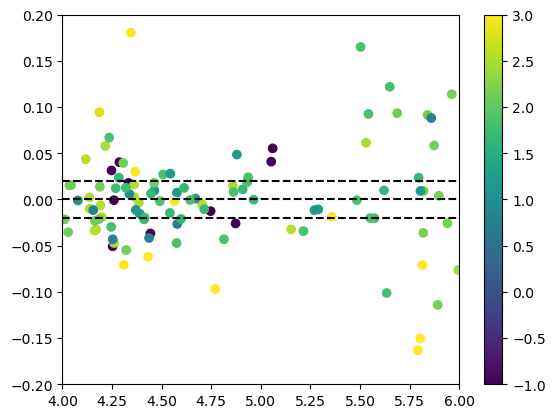

In [45]:
#Cycle through the files in this directory and plot the residuals

files = os.listdir()
os.chdir('/hpc/home/cfm37/RomanASP')

mags = []
residuals = []

#cd into results
os.chdir('./results')
files = os.listdir()
print(files)
allresiduals = []
for f in files:
    if 'detections' in f:
        print('----')
        

        residuals = pd.read_csv(f)
        print(residuals['confusion_metric'])


        mag_residual = -2.5*np.log10(residuals['measured_flux']) +2.5 * np.log10(residuals['realized flux'])
        ID = f.split('_')[0]
        plt.scatter(14 - 2.5*np.log10(residuals['realized flux']), mag_residual, marker = 'o', label = ID, c = np.log10(residuals['confusion_metric']), vmin = -1, vmax = 3)
        #plt.text(14 - 2.5*np.log10(residuals['realized flux'][0]), np.max(np.abs(mag_residual)), str(residuals['id'][0]))
        print(ID)
        allresiduals.extend(mag_residual)





#plt.legend()
plt.axhline(0, color = 'k', ls = '--')
plt.axhline(0.02, color = 'k', ls = '--')
plt.axhline(-0.02, color = 'k', ls = '--')
plt.xlim(4,6)
plt.ylim(-0.2,0.2)
plt.colorbar()
print(np.nanmean(allresiduals))
print(np.nanstd(allresiduals))


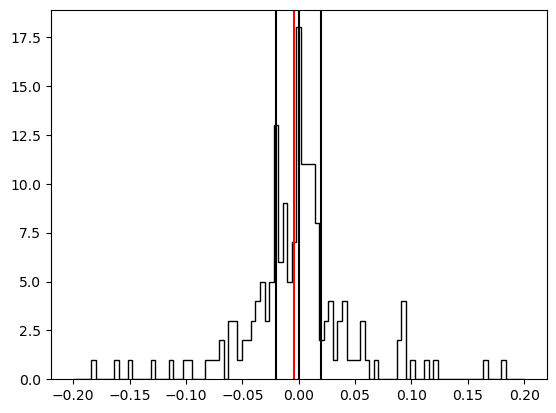

In [50]:
plt.hist(allresiduals, bins = np.linspace(-0.2,0.2,100), histtype = 'step', color = 'k')
plt.axvline(np.nanmean(allresiduals), color = 'r')
plt.axvline(0, color = 'k')
plt.axvline(20/1000, color = 'k')
plt.axvline(-20/1000, color = 'k')

['30666595_Y106_detections.csv', '40084671_Y106_detections.csv', '60144043_Y106_detections.csv', '50010393_Y106_detections.csv', '40120913_Y106_detections.csv', '50134575_Y106_detections.csv', '50061540_Y106_detections.csv', '40018655_Y106_detections.csv', '50129236_Y106_detections.csv', '30000921_Y106_detections.csv', '50049302_Y106_detections.csv', '50099064_Y106_detections.csv', '50027278_Y106_detections.csv', '20170506_Y106_detections.csv', '50022453_Y106_detections.csv', '50144007_Y106_detections.csv', '20055347_Y106_detections.csv', '50106142_Y106_detections.csv', '50123776_Y106_detections.csv']
----
0    143.647072
1    143.647072
2    143.647072
3    143.647072
4    143.647072
5    143.647072
6    143.647072
7    143.647072
8    143.647072
9    143.647072
Name: confusion_metric, dtype: float64
30666595
----
0    0.099016
1    0.099016
2    0.099016
3    0.099016
4    0.099016
5    0.099016
6    0.099016
7    0.099016
8    0.099016
9    0.099016
Name: confusion_metric, dtype: fl

/hpc/home/cfm37/miniconda3/envs/ColeRoman/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


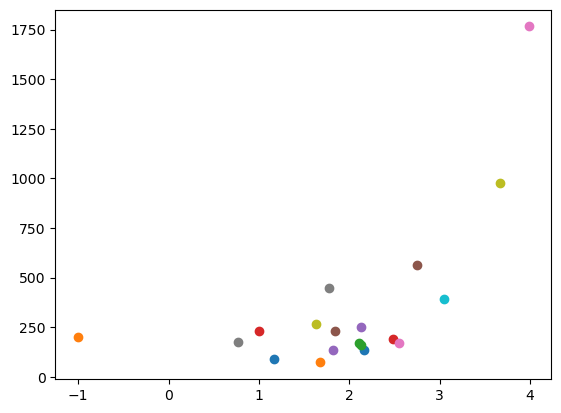

In [57]:
#Cycle through the files in this directory and plot the residuals

files = os.listdir()
os.chdir('/hpc/home/cfm37/RomanASP')

mags = []
residuals = []

#cd into results
os.chdir('./results')
files = os.listdir()
print(files)
allresiduals = []
for f in files:
    if 'detections' in f:
        print('----')
        

        residuals = pd.read_csv(f)
        print(residuals['confusion_metric'])


        mag_residual = -2.5*np.log10(residuals['measured_flux']) +2.5 * np.log10(residuals['realized flux'])
        flux_residual = residuals['measured_flux'] - residuals['realized flux']
        ID = f.split('_')[0]
        std = np.nanstd(mag_residual)
        std = np.nanstd(flux_residual)
        bias = np.nanmean(mag_residual) 
        plt.scatter(np.log10(residuals['confusion_metric'][0]), std, marker = 'o', label = ID)
        #plt.text(14 - 2.5*np.log10(residuals['realized flux'][0]), np.max(np.abs(mag_residual)), str(residuals['id'][0]))
        print(ID)
        allresiduals.extend(mag_residual)





62444.6394 6.701501017210531
Overall Bias: 13.31 mmag 
Overall Scatter: 106.16 mmag
[1751. 1640. 1870. 1674. 1742.]
[1786.85907433 1377.04098822 2037.98355106 1804.21258587 1627.92193954]


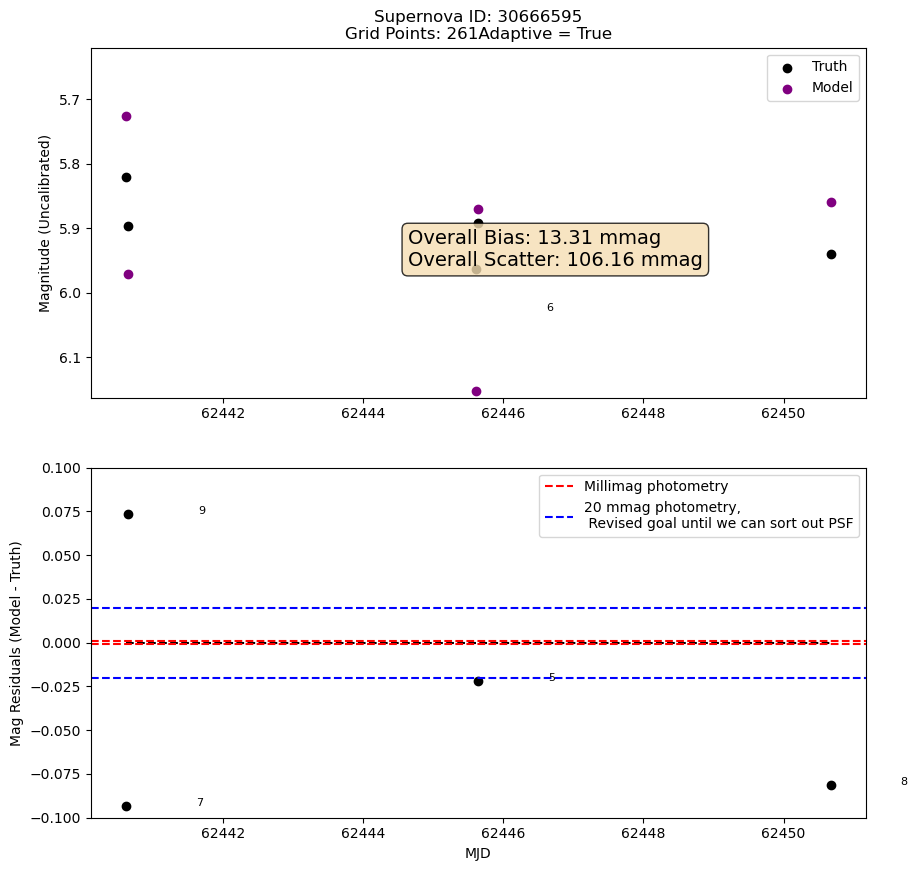

In [5]:
#Plot the lightcurve we found.



if use_real_images:
    supernova = np.array(exposures['realized flux'][np.where(exposures['DETECTED'])])
else:
    supernova = np.array(supernova)


plt.figure(figsize = (10,10))
plt.subplot(2,1,1)
if use_real_images:
    plt.title('Supernova ID: ' + str(ID) + '\n' + 'Grid Points: ' + str(np.size(ra_grid)) + 'Adaptive = ' + str(adaptive_grid))
    dates = exposures['date'][np.where(exposures['DETECTED'])]
else:
    dates = np.arange(detim)
    plt.title('Grid Points: ' + str(np.size(ra_grid)) + 'Adaptive = ' + str(adaptive_grid))


plt.scatter(dates, 14-2.5*np.log10(supernova), color = 'k', label = 'Truth')
plt.scatter(dates, 14-2.5*np.log10(X[-detim:]), color = 'purple', label = 'Model')

plt.ylim(14 - 2.5*np.log10(np.min(supernova)) + 0.2, 14 - 2.5*np.log10(np.max(supernova)) - 0.2)
plt.ylabel('Magnitude (Uncalibrated)')


bias = np.mean(-2.5*np.log10(X[-detim:])+2.5*np.log10(np.array(supernova)))
bias *= 1000
bias = np.round(bias, 2)
scatter = np.std(-2.5*np.log10(X[-detim:])+2.5*np.log10(np.array(supernova)))
scatter *= 1000
scatter = np.round(scatter, 2)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
textstr = 'Overall Bias: ' + str(bias) + ' mmag \n' + \
    'Overall Scatter: ' + str(scatter) + ' mmag'
plt.text(np.mean(dates), 14 - 2.5*np.log10(np.mean(supernova)), textstr,  fontsize=14,
        verticalalignment='top', bbox=props)
print(np.mean(dates), 14 - 2.5*np.log10(np.mean(supernova)) + .8)
print(textstr)
plt.legend()

print(supernova)
print(X[-detim:])

plt.subplot(2,1,2)

flux_mode = False
if flux_mode:
    plt.scatter(dates, X[-detim:] - supernova, color = 'k')
    for i,dr in enumerate(zip(dates, X[-detim:] - supernova)):
        d,r = dr
        plt.text(d+1,r,i+testnum-detim, fontsize = 8)
else:
    plt.scatter(dates, -2.5*np.log10(X[-detim:])+2.5*np.log10(supernova), color = 'k')
    plt.plot([np.min(dates), np.max(dates)], [0,0], ls = '--', color = 'k')
    plt.ylabel('Mag Residuals (Model - Truth)')
    plt.xlabel('MJD')
    plt.ylim(-0.1, 0.1)
    for i,dr in enumerate(zip(dates, -2.5*np.log10(X[-detim:])+2.5*np.log10(supernova))):
        d,r = dr
        plt.text(d+1,r,i+testnum-detim, fontsize = 8)

plt.axhline(0.001, color = 'r', ls = '--')
plt.axhline(-0.001, color = 'r', ls = '--', label = 'Millimag photometry')

plt.axhline(0.02, color = 'b', ls = '--')
plt.axhline(-0.02, color = 'b', ls = '--', label = '20 mmag photometry, \n Revised goal until we can sort out PSF')



plt.legend()


removing gal ra and galdec for now, something is broken
0 0
multiplying by weights
multiplying by weights
BIAS 34.80758725370121
STD 202.0561447923999
removing gal ra and galdec for now, something is broken
0 0
multiplying by weights
multiplying by weights
BIAS 30.809393731133152
STD 152.89215885504177
removing gal ra and galdec for now, something is broken
0 0
multiplying by weights
multiplying by weights
BIAS 48.42147934980146
STD 203.8398941430717
removing gal ra and galdec for now, something is broken
0 0
multiplying by weights
multiplying by weights
BIAS 0.2725664416218924
STD 187.3170490591506
removing gal ra and galdec for now, something is broken
0 0
multiplying by weights
multiplying by weights
BIAS 38.63858020335041
STD 183.38971769344403
removing gal ra and galdec for now, something is broken
0 0
multiplying by weights
multiplying by weights
BIAS -5.811679687292337
STD 108.8718285188196
removing gal ra and galdec for now, something is broken
0 0
multiplying by weights
multip

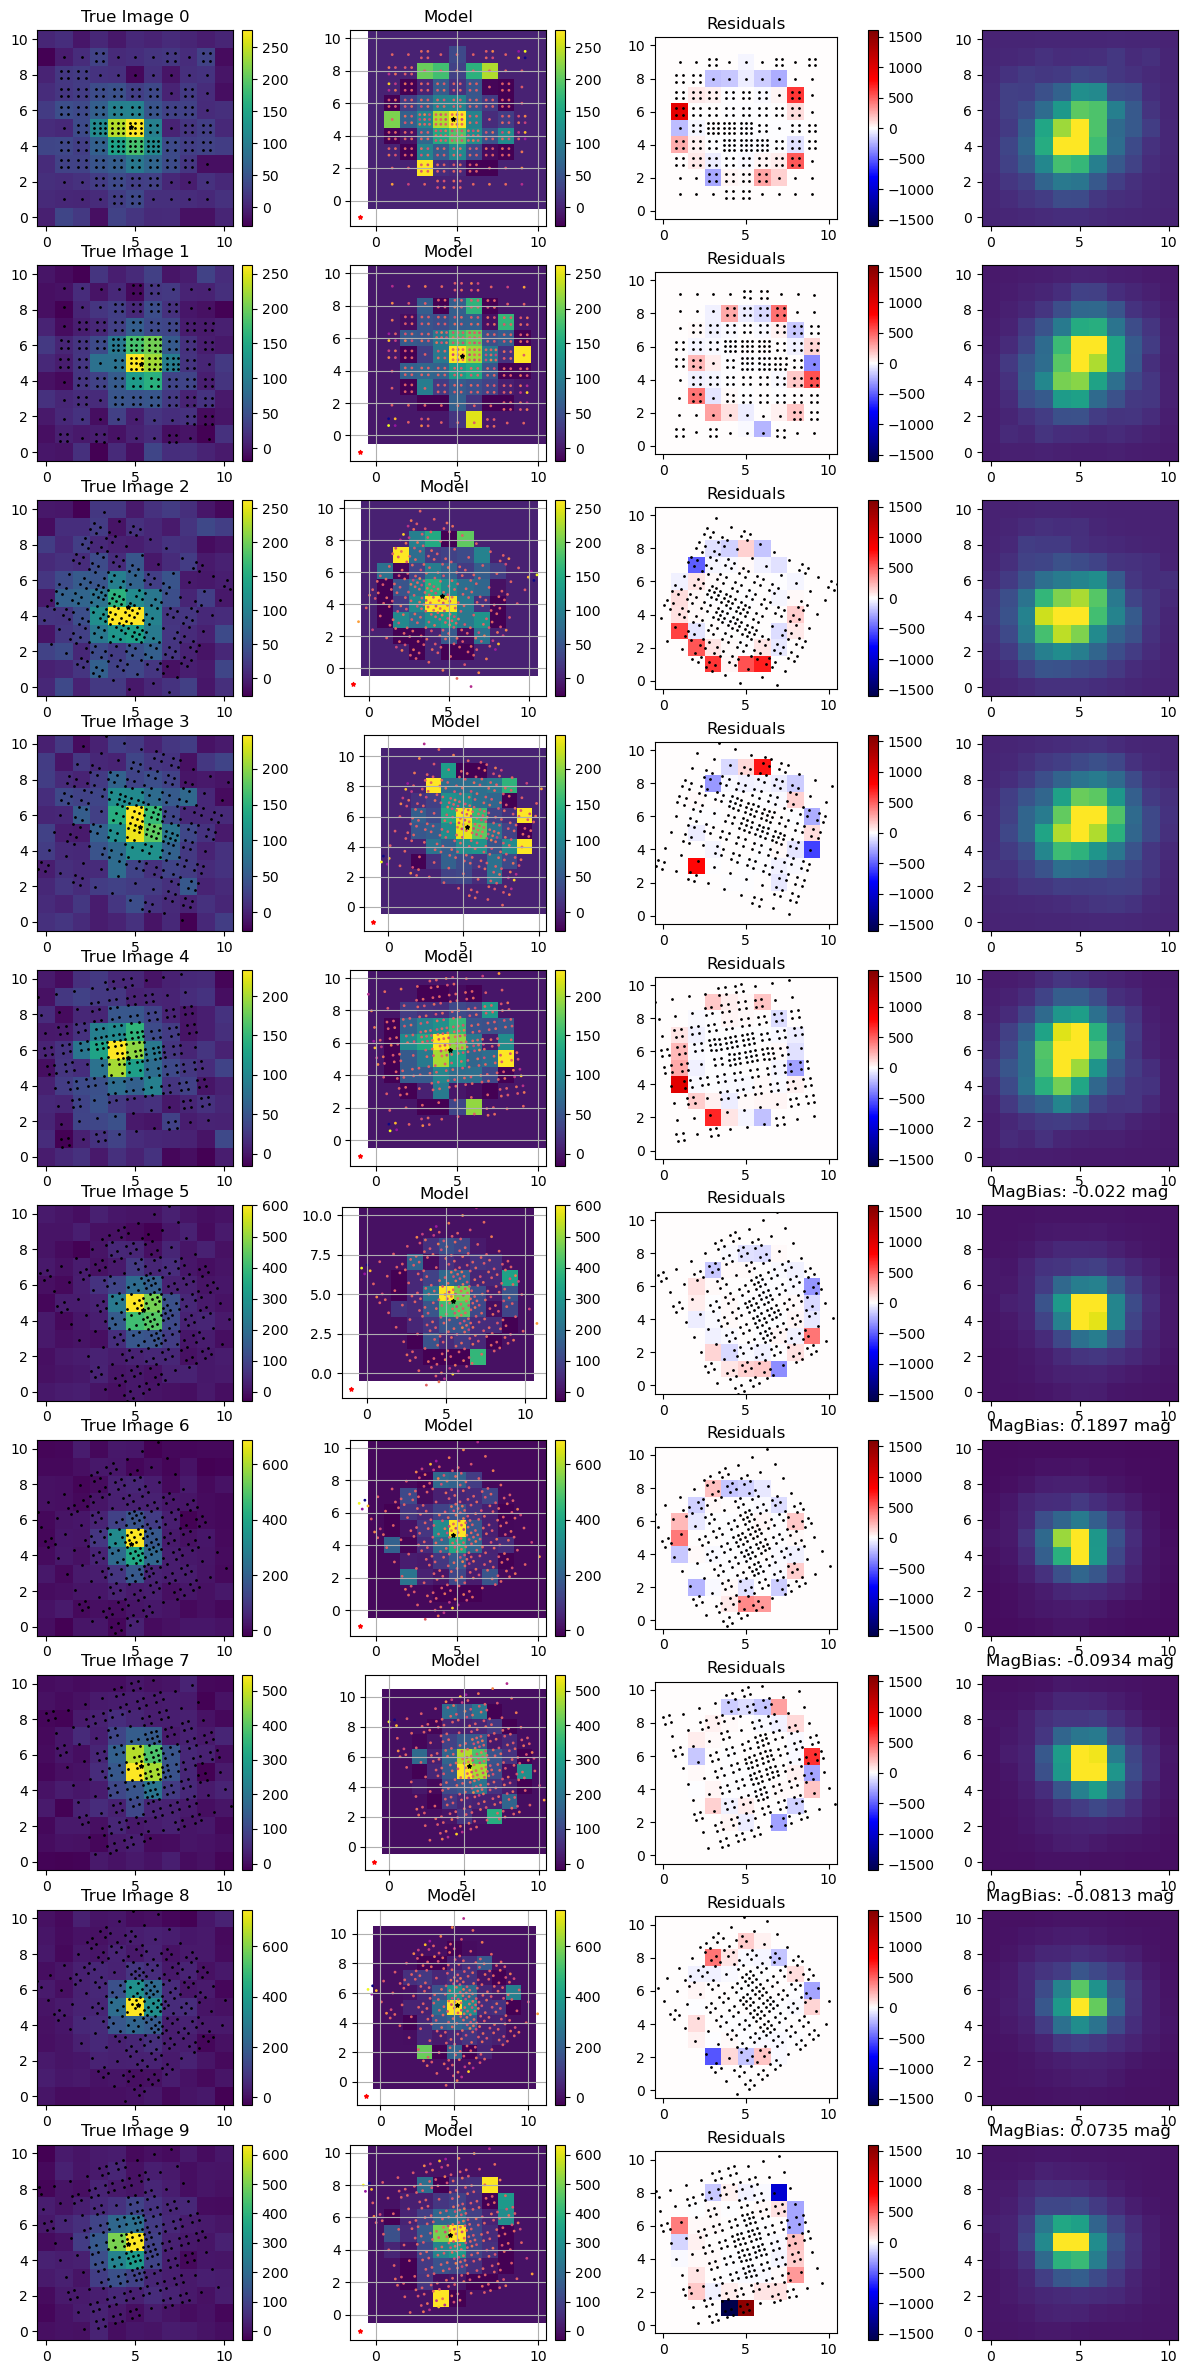

In [6]:
biases = []

fig = plt.figure(figsize = (15,3*testnum))



pred = X * psf_matrix




sumimages = np.sum(pred, axis = 1)
if make_initial_guess and testnum - detim != 0:
    pred0 = x0test.flatten() * psf_matrix
    sumimages0 = np.sum(pred0, axis = 1)
if detim > 0:
    magresiduals = -2.5*np.log10(X[-detim:])+2.5*np.log10(np.array(supernova))

galxes = []
stds = []
biases = []

for i, wcs in enumerate(cutout_wcs_list):

    extent = [-0.5, size-0.5, -0.5, size-0.5]
    if type(wcs) == galsim.fitswcs.AstropyWCS:
        #galx, galy = wcs.toImage(galra, galdec, units='deg')
        print('removing gal ra and galdec for now, something is broken')
        galx, galy = 0, 0
        xx, yy = cutout_wcs_list[i].toImage(ra_grid, dec_grid,units='deg')
    else:
        galx, galy = cutout_wcs_list[i].world_to_pixel(SkyCoord(ra = galra*u.degree, dec = galdec*u.degree))
        xx, yy = cutout_wcs_list[i].world_to_pixel(SkyCoord(ra = ra_grid*u.degree, dec = dec_grid*u.degree))
        

    xx -= 1
    yy -= 1


   
    snx, sny = wcs.toImage(snra, sndec, units = 'deg')
    
    plt.subplot(len(cutout_wcs_list), 4, 4*i+1)
    plt.scatter(xx, yy, color = 'k', s = 1)
    plt.title('True Image ' + str(i))
    plt.scatter(snx-1, sny-1, c = 'k', s = 8, marker = '*')
    print(galx,galy)
    plt.scatter(galx-1,galy-1, c = 'r', s = 8, marker = '*')
    plt.imshow(images[i*size**2:(i+1)*size**2].reshape(size,size), origin = 'lower', extent = extent)
    plt.colorbar(fraction=0.046, pad=0.04)
    trueimage = images[i*size**2:(i+1)*size**2].reshape(size,size)

    '''
    
    argsort = np.argsort(trueimage.flatten())
    brightest = argsort[-5:]
    print(brightest)
    print('Brightest pixels in image', trueimage.flatten()[brightest])
    for k in range(5):
        #label each point with its value

        xbright = brightest[k]%size
        ybright = brightest[k]//size
        xmod = (xbright - 5)
        ymod = (ybright - 5)

        plt.text(xbright + xmod,ybright + ymod, str(np.round(trueimage.flatten()[brightest][k],0)), fontsize = 8, color = 'C'+str(k))
        plt.scatter(brightest[k]%size, brightest[k]//size, color = 'C'+str(k), s = 10)
    '''

    ############################################

    plt.subplot(len(cutout_wcs_list), 4, 4*i+2)
    plt.title('Model')
    
    im1 = sumimages[i*size**2:(i+1)*size**2].reshape(size,size)
    if type(cutout_wcs_list[i]) == galsim.fitswcs.AstropyWCS:
        xx, yy = cutout_wcs_list[i].toImage(ra_grid, dec_grid,units='deg')
    else:
        xx, yy = cutout_wcs_list[i].world_to_pixel(SkyCoord(ra = ra_grid*u.degree, dec = dec_grid*u.degree))

    xx -= 1
    yy -= 1

    if weighting:
        print('multiplying by weights')
        
    vmin = np.min(images[i*size**2:(i+1)*size**2].reshape(size,size))
    vmax = np.max(images[i*size**2:(i+1)*size**2].reshape(size,size))

    if weighting:
        im1[np.where(wgt_matrix[i*size**2:(i+1)*size**2].reshape(size,size) == 0)] = 0
    plt.imshow(im1, extent = extent, origin = 'lower', vmin = vmin, vmax = vmax)
    plt.colorbar(fraction=0.046, pad=0.04)
    

    if fit_background:
        plt.scatter(xx,yy, c = X[:np.size(ra_grid)], cmap = 'plasma', s = 1)
    elif not single_grid_point:
        if detim != 0:
            plt.scatter(xx,yy, c = X[:-testnum], cmap = 'plasma', s = 1)
        else:
            plt.scatter(xx,yy, c = X, cmap = 'plasma', s = 1)

    
    
    plt.scatter(galx-1,galy-1, c = 'r', s = 8, marker = '*')
    plt.scatter(snx-1, sny-1, c = 'k', s = 8, marker = '*')

    #plt.xlim(-1,size)
    #plt.ylim(-1,size)
    plt.grid(True, which = 'both')
    
    ############################################
    plt.subplot(len(cutout_wcs_list),4,4*i+3)
    plt.title('Residuals')
    plt.scatter(xx,yy,color = 'k', s = 1)
    res = images - sumimages
    if weighting:
        print('multiplying by weights')
        #res*=wgt_matrix
        
        
    current_res= res[i*size**2:(i+1)*size**2].reshape(size,size)
    if weighting:
        current_res[np.where(wgt_matrix[i*size**2:(i+1)*size**2].reshape(size,size) == 0)] = 0
        print('BIAS', np.mean(current_res[np.where(wgt_matrix[i*size**2:(i+1)*size**2].reshape(size,size) != 0)]))
        biases.append(np.mean(current_res[np.where(wgt_matrix[i*size**2:(i+1)*size**2].reshape(size,size) != 0)]))
        print('STD', np.std(current_res[np.where(wgt_matrix[i*size**2:(i+1)*size**2].reshape(size,size) != 0)]))

    galxes.append(galx)
    biases.append(np.mean(current_res))
    stds.append(np.std(current_res))
    if i == 0:
        norm = np.max(np.abs(res[np.where(wgt_matrix != 0)]))
    #norm = 1

    plt.imshow(current_res, extent = extent, origin = 'lower', cmap = 'seismic', vmin = -norm, vmax = norm)
    #plt.imshow(wgt_matrix[i*size**2:(i+1)*size**2].reshape(size,size), extent = extent, origin = 'lower')
    plt.colorbar(fraction=0.046, pad=0.14)
    #plt.scatter(galx,galy, c = 'r', s = 12, marker = '*', edgecolors='k')
    

    ############################################
    plt.subplot(len(cutout_wcs_list),4,4*i+4)
    #plt.hist(trueimage.flatten(), bins = np.linspace(-50,50,20), histtype = 'step', color = 'k', density = True)
    
    if i >= testnum - detim:
        plt.title('MagBias: ' + str(np.round(magresiduals[i - testnum + detim],4)) + ' mag')

    im1_guess = sumimages0[i*size**2:(i+1)*size**2].reshape(size,size)
    plt.imshow(im1_guess, extent = extent, origin = 'lower', vmin = vmin, vmax = vmax)
    
    #plt.hist(current_res[np.where(wgt_matrix[i*size**2:(i+1)*size**2].reshape(size,size) != 0)], bins = np.linspace(-norm/2,norm/2,30), histtype = 'step', color = 'k', density = True)
    #plt.axvline(np.mean(trueimage.flatten()[np.where(trueimage.flatten()< 50)]), color = 'r')
    '''
    justbgX = np.copy(X)
    justbgX[-testnum:] = 0

    justbgpred = justbgX * psf_matrix
    justbgsumimages = np.sum(justbgpred, axis = 1)
    justbgim = justbgsumimages[i*size**2:(i+1)*size**2].reshape(size,size)
    

    #subtract off the real sn
    #if i >= testnum - detim:
        #print('subtracting sn')
        #justbgim -= sn_matrix[i*size**2:(i+1)*size**2, i].reshape(size,size)*supernova[i - testnum + detim]
    


    
    #get the 5 brightest pixels in the image
    justbgres = trueimage - justbgim
    im1 = sumimages[i*size**2:(i+1)*size**2].reshape(size,size)


    plt.plot(trueimage[5], label = 'Image')
    plt.plot(im1[5], label = 'Model')
    plt.plot(justbgim[5], label = 'Background Only')
    plt.plot(justbgres[5], label = 'Image Background Subtracted')
    
    if i >= testnum - detim:
        snim = sn_matrix[i*size**2:(i+1)*size**2, i].reshape(size,size)*supernova[i - testnum + detim]
        print('multiplying by ', supernova[i - testnum + detim])
    else:
        snim = np.zeros_like(justbgres)


    plt.plot(snim[5], label = 'Perfect Supernova')
    plt.axvline(snx-1+1, ls = '--', color = 'k')
    plt.axvline(snx-1-1, ls = '--', color = 'k')
    if i >= testnum - 1 or i == 0:
        plt.legend()
    
    #plt.imshow(justbgres, extent = extent, origin = 'lower', vmin = -200, vmax = 200)
    #plt.colorbar(fraction=0.046, pad=0.04)
    '''
 

plt.subplots_adjust(wspace = 0.4)

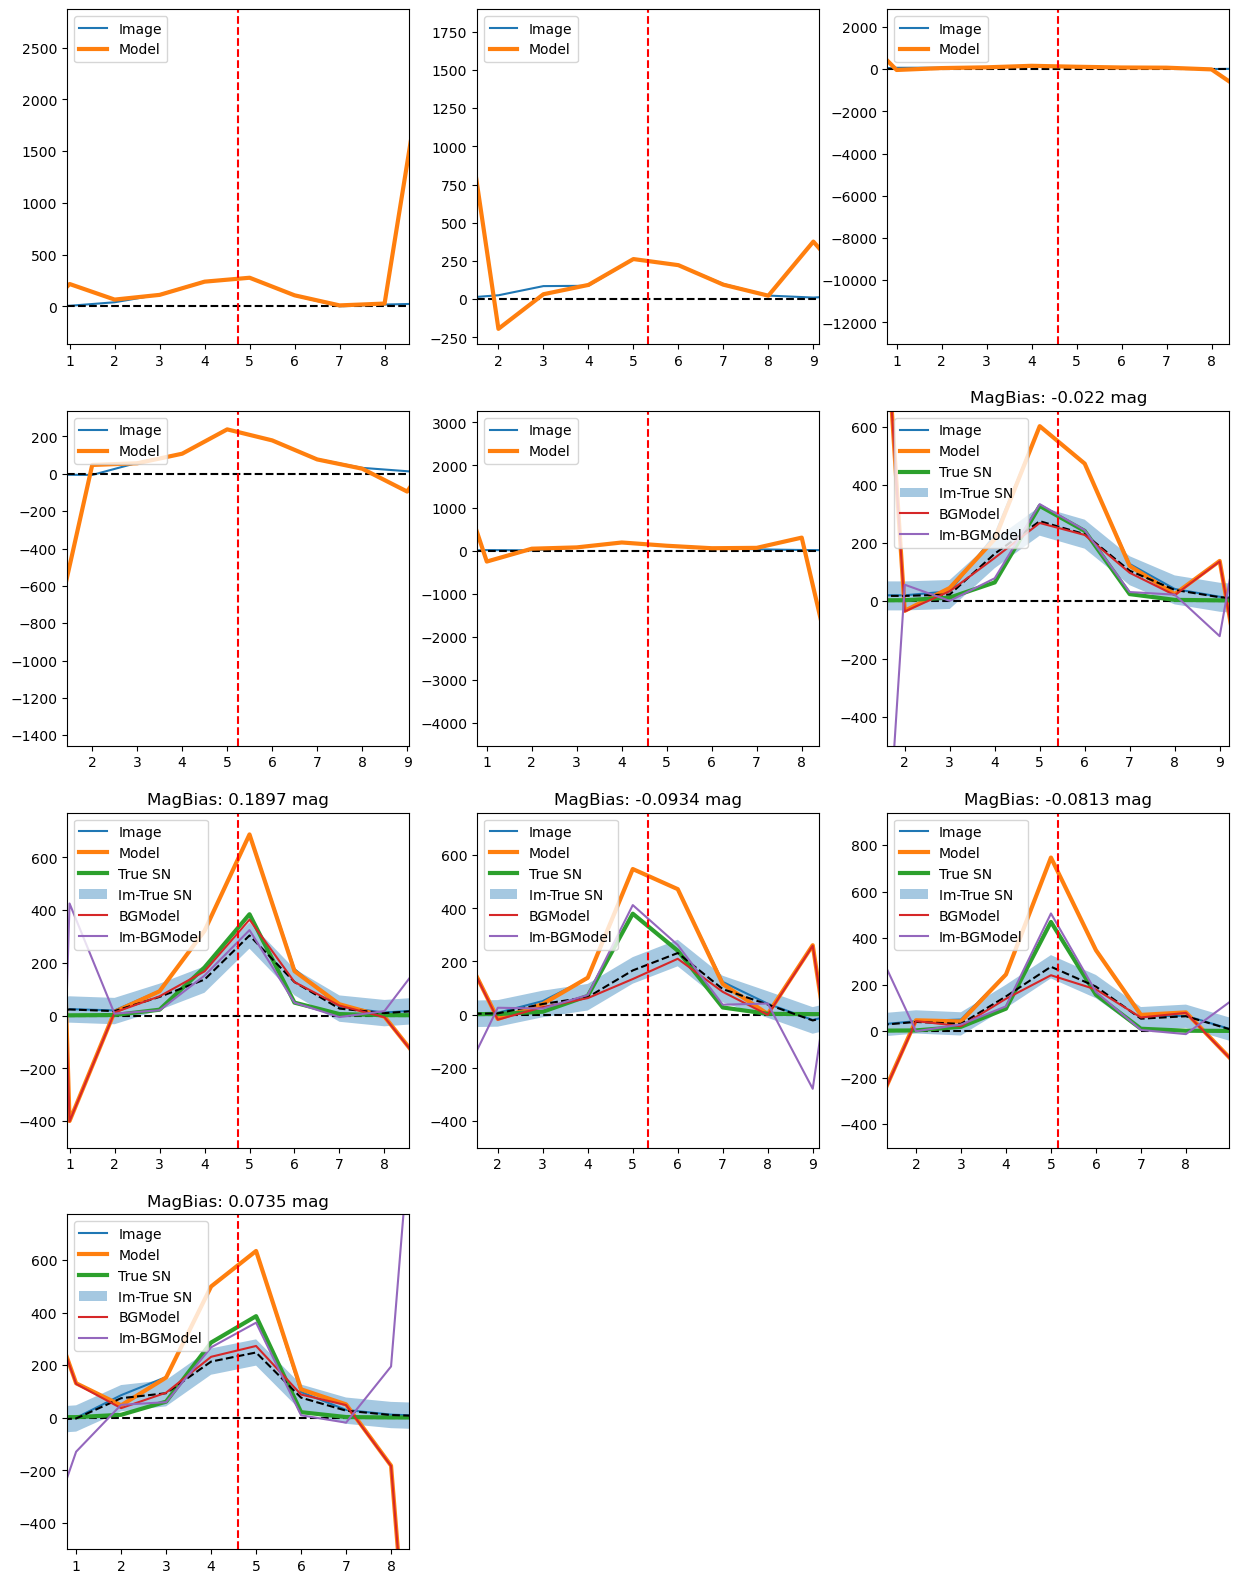

In [10]:
biases = []
fig = plt.figure(figsize = (15,2*testnum))


#realSNX = np.copy(X)
#
# NX[-detim:] = supernova
#X = np.zeros_like(X)
#X[50] = 500000
pred = X * psf_matrix
#print(pred[50])
#print('setting X to 0 as A TEST AAAAAAAAAAAAAAAAAACJDABHSLJFNSJDF')

centralpixel_model = []
centralpixel_image = []


sumimages = np.sum(pred, axis = 1)
if make_initial_guess and testnum - detim != 0:
    pred0 = x0test.flatten() * psf_matrix
    sumimages0 = np.sum(pred0, axis = 1)

if detim > 0:
    magresiduals = -2.5*np.log10(X[-detim:])+2.5*np.log10(np.array(supernova))

galxes = []
stds = []
biases = []

for i, wcs in enumerate(cutout_wcs_list):

    extent = [-0.5, size-0.5, -0.5, size-0.5]
    trueimage = images[i*size**2:(i+1)*size**2].reshape(size,size)
    snx, sny = wcs.toImage(snra, sndec, units = 'deg')

    plt.subplot(len(cutout_wcs_list)//3 + 1,3,i+1)
    if i >= testnum - detim:
        plt.title('MagBias: ' + str(np.round(magresiduals[i - testnum + detim],4)) + ' mag')


    justbgX = np.copy(X)
    justbgX[-testnum:] = 0

    justbgpred = justbgX * psf_matrix
    justbgsumimages = np.sum(justbgpred, axis = 1)
    justbgim = justbgsumimages[i*size**2:(i+1)*size**2].reshape(size,size)
    

    #subtract off the real sn
    #if i >= testnum - detim:
        #print('subtracting sn')
        #justbgim -= sn_matrix[i*size**2:(i+1)*size**2, i].reshape(size,size)*supernova[i - testnum + detim]
    


    
    justbgres = trueimage - justbgim
    im1 = sumimages[i*size**2:(i+1)*size**2].reshape(size,size)


    plt.plot(trueimage[5], label = 'Image')
    centralpixel_image.append(np.sum(trueimage[5][3:7]))
    plt.axhline(0, ls = '--', color = 'k')
    plt.plot(im1[5], label = 'Model', lw = 3)
    #plt.ylim(-250,250)
    centralpixel_model.append(np.sum(justbgim[5][3:7]))

    
    
    if i >= testnum - detim:
        snim = sn_matrix[i*size**2:(i+1)*size**2, i].reshape(size,size)*supernova[i - testnum + detim]
        plt.plot(snim[5], label = 'True SN', lw = 3)
        plt.fill_between(np.arange(0,11,1), trueimage[5] - snim[5] + 50, trueimage[5] - snim[5] - 50, label = 'Im-True SN', alpha = 0.4)
        plt.plot(np.arange(0,11,1), trueimage[5] - snim[5] , color = 'k', ls = '--')
        plt.plot(justbgim[5], label = 'BGModel')
        plt.plot(justbgres[5], label = 'Im-BGModel')
        
        #plt.plot(justbgres[5] - snim[5], label = 'SN Residuals', ls = '--')
        plt.ylim(-500,np.max(snim[5])*2)
        snim = sn_matrix[i*size**2:(i+1)*size**2, i].reshape(size,size)*X[-detim:][i - testnum + detim]

    else:
        snim = np.zeros_like(justbgres)


    
    plt.axvline(snx-1+4, ls = '--', color = 'k')
    plt.axvline(snx-1-4, ls = '--', color = 'k')
    plt.axvline(snx-1, ls = '--', color = 'r')

    plt.xlim(snx-1-3.8, snx-1+3.8)


    plt.legend(loc = 'upper left')
    




2288.3301656192034 1425.410828282497
2288.3301656190897 1425.4108282831605
1.1368683772161603e-10 -6.634763849433511e-10


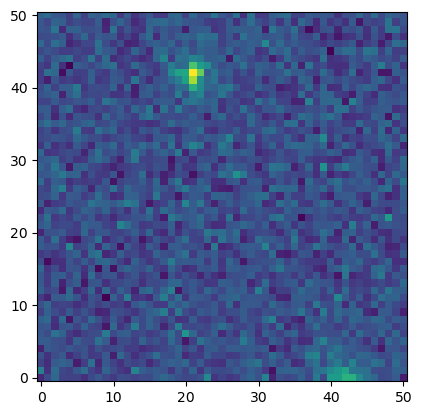

In [157]:
hdu_list = fits.open(roman_path + f'/RomanTDS/images/{truth}/{band}/{pointing}/Roman_TDS_{truth}_{band}_{pointing}_{SCA}.fits.gz')

image = galsim.fits.read(hdu_list = hdu_list[1])
x,y = image.wcs.toImage(7.6,-44.2, units = 'deg')

print(x,y)


wcs2 = WCS(hdu_list[1])
wcs2 = galsim.AstropyWCS(wcs = wcs2)

#print(wcs2)

x2,y2 = wcs2.toImage(7.6,-44.2, units = 'deg')
print(x2,y2)
print(x-x2, y-y2)

bounds = galsim.BoundsI(int(x - 25), int(x + 25), int(y - 25), int(y + 25))
image = image[bounds]

plt.imshow(image.array, origin = 'lower')
#image.wcs.toImage(7.6,-44.2, units = 'deg')

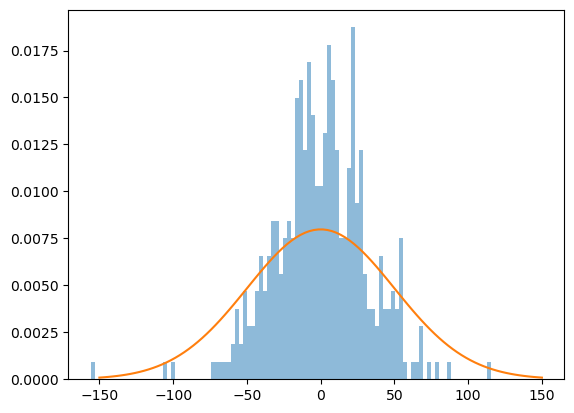

In [14]:
plt.hist((images - sumimages)[np.where(wgt_matrix != 0)], bins = 100, alpha = 0.5, label = 'Residuals', density= True)
#overplot a gaussian
mean = np.mean((images - sumimages)[np.where(wgt_matrix != 0)])
std = 50

x = np.linspace(-3*std,3*std,100)
plt.plot(x, 1/(std*np.sqrt(2*np.pi))*np.exp(-0.5*(x-mean)**2/std**2), label = 'Gaussian Fit')

[40973065058, 40973069056, 40973069056, 40973069437, 40973069007, 40973066659, 41024094797, 40973065671, 40973065671, 41024094247, 40973068488, 40973067254, 40973067779, 40973067105, 40973069150, 40973067291, 41024094391, 40973066222, 40973069174, 41024094751]
917 Potential Candidates
-----------------------
27.63367435233032 zpt
realized flux 22135    16977.0
Name: realized_flux, dtype: float64
measured flux [16592.36923738]
-----------------------
27.597032121020195 zpt
realized flux 22175    16784.0
Name: realized_flux, dtype: float64
measured flux [17000.73411222]
-----------------------
27.655797626691033 zpt
realized flux 21452    16922.0
Name: realized_flux, dtype: float64
measured flux [16981.9788038]
-----------------------
27.61268412018935 zpt
realized flux 22971    17175.0
Name: realized_flux, dtype: float64
measured flux [17814.91282759]
-----------------------
27.661771646441444 zpt
realized flux 22399    17012.0
Name: realized_flux, dtype: float64
measured flux [17185.60

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


27.604242172119765 zpt
realized flux 23252    1235.0
Name: realized_flux, dtype: float64
measured flux [1196.05873751]
STD: 0.030389050986648975
mean: 0.0038649825003746587
ZPT: [27.533757667400266, 27.637947127873026, 27.576451322869843, 27.587881837350075, 27.61000415527048, 27.59811200840697, 27.592451089677805, 27.626146631931398, 27.56095659631211, 27.604242172119765]
Measured: [1169.9514969103652, 1185.2997996835168, 1142.4850681258872, 1088.9767634870846, 1277.7509084935828, 1107.0131215007073, 1176.148800838352, 1202.873474848487, 1287.7409400259733, 1196.0587375096657]
Realized: [1130.0, 1165.0, 1146.0, 1123.0, 1235.0, 1145.0, 1181.0, 1194.0, 1230.0, 1235.0]


<Figure size 500x2500 with 0 Axes>

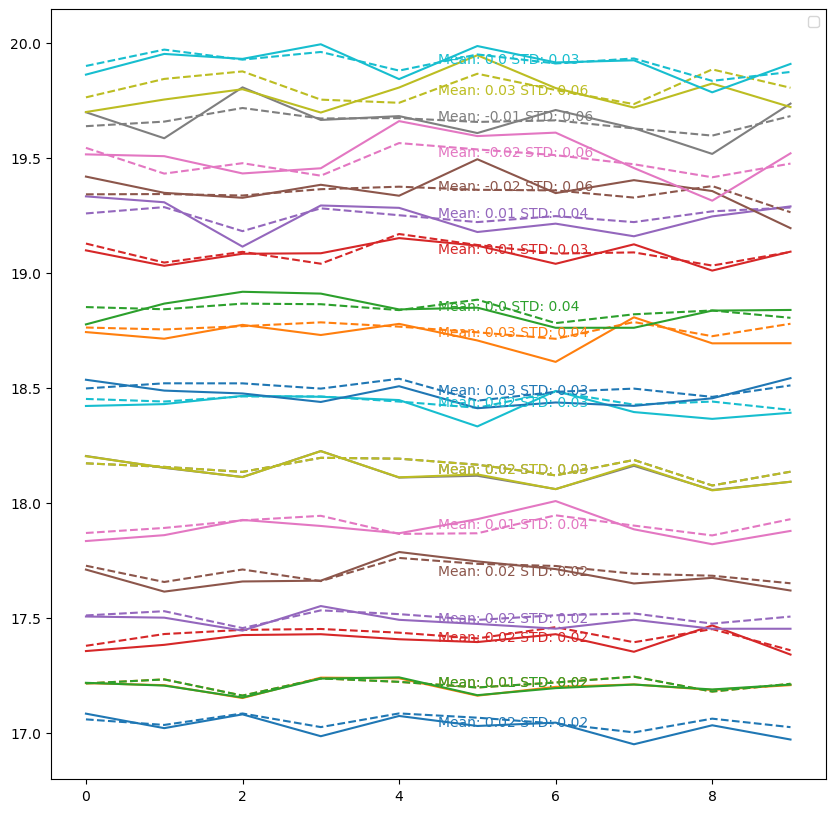

In [10]:
sn_path = '/cwork/mat90/RomanDESC_sims_2024/roman_rubin_cats_v1.1.2_faint/'
plt.figure(figsize = (5,25))
band = 'F184'
pointing, SCA = 13021, 15
cat = pd.read_csv(roman_path+f'/RomanTDS/truth/{band}/{pointing}/Roman_TDS_index_{band}_{pointing}_{SCA}.txt',\
                                sep="\s+", skiprows = 1,
                                names = ['object_id', 'ra', 'dec', 'x', 'y', 'realized_flux', 'flux', 'mag', 'obj_type'])
cat_star = cat.loc[cat['obj_type'] == 'star']
IDs = []
ras = []
decs = []
for i in np.linspace(4,7,20):
    #print(i)
    #print(np.max(cat_star['mag']), np.min(cat_star['mag']))
    cat_close = cat_star.loc[np.isclose(cat_star['mag'], i, atol = 0.1)]
    IDs.append(cat_close.object_id.values[0])
    ras.append(cat_close.ra.values[0])
    decs.append(cat_close.dec.values[0])


print(IDs)

size = 25  
nbg = -1
plt.figure(figsize = (10,10))
for i, ID in enumerate(IDs):
    ra = ras[i]
    dec = decs[i]
    start = 0
    end = 10**999
    p = pointing
    s = SCA
    peak = 0

    server_url = 'https://roman-desc-simdex.lbl.gov'
    req = requests.Session()
    result = req.post( f'{server_url}/findromanimages/containing=({ra},{dec})' )
    if result.status_code != 200:
        raise RuntimeError( f"Got status code {result.status_code}\n{result.text}" )

    res = pd.DataFrame(result.json())[['filter','pointing','sca', 'mjd']]
    res.rename(columns = {'mjd':'date', 'pointing': 'Pointing', 'sca': 'SCA'}, inplace = True)
    print(res.shape[0], 'Potential Candidates')
    res = res.loc[res['filter'] == band]

    realized_flux = []
    measured_flux = []
    zpts = []
    for index, row in res.iterrows():
        print('-----------------------')
        p = row['Pointing']
        s = row['SCA']
        image = fits.open(roman_path + f'/RomanTDS/images/truth/{band}/{p}/Roman_TDS_truth_{band}_{p}_{s}.fits.gz')
        scawcs = WCS(image[0].header)
        x,y = scawcs.world_to_pixel(SkyCoord(ra = ra*u.degree, dec = dec*u.degree))
        if x < 25 or x > 2*2048 - 25 or y < 25 or y > 2*2048 - 25:
            print('Out of bounds')
            continue

        cutout = Cutout2D(image[0].data, SkyCoord(ra = ra*u.degree, dec = dec*u.degree), size, wcs = scawcs)
        cutoutwcs = galsim.AstropyWCS(wcs = cutout.wcs)
        x_center, y_center = cutoutwcs.toImage(ra, dec, units = 'deg')
        psf = construct_psf_source(x, y, pointing, SCA, stampsize=25,  x_center = x_center, y_center = y_center)
        #fit the psf to the image
        im = cutout.data
        #plt.subplot(1,2,1)
        #plt.imshow(im.reshape(25,25), origin = 'lower')
        #plt.grid('True')
        #plt.subplot(1,2,2)
        #plt.imshow(psf.reshape(25,25), origin = 'lower')
        #plt.grid('True')
        im = im.flatten()
        #plt.hist(im, bins = 100)
        psf = psf.flatten()
        psf = psf.reshape(-1,1)
        lsqr = sp.linalg.lsqr(psf, im, atol = 1e-12, btol = 1e-12, iter_lim=300000, conlim = 1e10)
        cat = pd.read_csv(roman_path+f'/RomanTDS/truth/{band}/{p}/Roman_TDS_index_{band}_{p}_{s}.txt',\
                                sep="\s+", skiprows = 1,
                                names = ['object_id', 'ra', 'dec', 'x', 'y', 'realized_flux', 'flux', 'mag', 'obj_type'])

        cat_star = cat.loc[cat['obj_type'] == 'star']
        logflux = -2.5*np.log10(cat_star['flux'])
        exptime = image[0].header['EXPTIME']
        area_eff = roman.collecting_area
        galsim_zp = roman.getBandpasses()[band].zeropoint
        truthmag = -2.5*np.log10(cat['flux']) + 2.5*np.log10(exptime*area_eff) + galsim_zp
        mag = cat_star['mag']


        zpt = np.nanmedian(truthmag)
        print(zpt, 'zpt')
        zpts.append(zpt)

        
        cat = cat.loc[cat['object_id'] == ID]
        print('realized flux', cat['realized_flux'])
        print('measured flux', lsqr[0])

        realized_flux.append(cat['realized_flux'].values[0])
        measured_flux.append(lsqr[0][0])
        #psf = psf.reshape(-1)
        #plt.imshow((im - lsqr[0]*psf).reshape(25,25), origin = 'lower', cmap = 'seismic', vmin = -80, vmax =80)
        #plt.colorbar()
        if len(realized_flux) == 10:
            break

    std = np.std(-2.5*np.log10(np.array(realized_flux)) - (-2.5*np.log10(np.array(measured_flux))))
    mean = np.mean(-2.5*np.log10(np.array(realized_flux)) - (-2.5*np.log10(np.array(measured_flux))))
    print('STD:', std)
    print('mean:', mean)
    print('ZPT:', zpts)
    print('Measured:', measured_flux)
    print('Realized:', realized_flux)
    plt.plot(-2.5*np.log10(np.array(realized_flux)) + np.array(zpts), color = 'C' + str(i), ls = '--')
    plt.plot(-2.5*np.log10(np.array(measured_flux)) + np.array(zpts), color = 'C' + str(i))
    plt.text(4.5, np.mean(-2.5*np.log10(np.array(measured_flux)) + np.array(zpts)), 'Mean: ' + str(np.round(mean,2)) + ' STD: ' + str(np.round(std,2)), color = 'C' + str(i)) 
    
        
        

    '''
    test = MultiDetection(ra, dec, p, s, band, start, end, peak, snid = ID, sigma_gaus = 0)
    test.runPhotometry(background = False, err = False, n_grid = nbg, maxbg = 0, maxdet = 10, roman_path = roman_path, \
                  pointing_list = None, SCA_list = None, bare_bones = False, precise = True, size = size)
    realized_flux = test.exposures[test.exposures['DETECTED']]['realized flux']
    truths = -2.5 * np.log10(realized_flux) + test.exposures['zeropoint'][-1]
    residuals = truths - test.mag
    plt.subplot(5,1,i+1)
    plt.plot(residuals, marker = 'o', label = 'realized residual :'+str(test.exposures['true mag'][0]))
    truths = test.exposures[test.exposures['DETECTED']]['true mag']
    residuals = truths - test.mag
    plt.plot(residuals, marker = 'o', label = 'true residual  :'+str(test.exposures['true mag'][0]))
    print('BIAS:', np.mean(residuals))
    #RMS of residuals
    print('RMS:', np.sqrt(np.mean(residuals**2) / np.size(residuals)))
    plt.plot(np.zeros(np.size(residuals)), label = 'Zeroline', color = 'k', ls = '--')
    plt.plot(np.zeros(np.size(residuals))+0.01, color = 'k', ls = '--')
    plt.plot(np.zeros(np.size(residuals))-0.01, color = 'k', ls = '--')
    plt.legend()



plt.show()
'''
plt.legend()
    

In [10]:
sn_path = '/cwork/mat90/RomanDESC_sims_2024/roman_rubin_cats_v1.1.2_faint/'
plt.figure(figsize = (7,7))
band = 'J129'

realized_flux = []
measured_flux = []

for SCA in range(1,19):
    if len(realized_flux) == 200:
            break
    print('Switching to SCA ', SCA)

    pointing = 17139
    size = 25
    cat = pd.read_csv(roman_path+f'/RomanTDS/truth/{band}/{pointing}/Roman_TDS_index_{band}_{pointing}_{SCA}.txt',\
                                    sep="\s+", skiprows = 1,
                                    names = ['object_id', 'ra', 'dec', 'x', 'y', 'realized_flux', 'flux', 'mag', 'obj_type'])
    cat_star = cat.loc[cat['obj_type'] == 'star']
    cat_star = cat_star.loc[cat_star['mag'] < 7]
    cat_star = cat_star.loc[cat_star['mag'] > 0]
    print(np.size(cat_star['flux']))

    image = fits.open(roman_path + f'/RomanTDS/images/truth/{band}/{pointing}/Roman_TDS_truth_{band}_{pointing}_{SCA}.fits.gz')
    scawcs = WCS(image[0].header)



    for i, row in cat_star.iterrows():
        print(i, row['mag'])
        ra = row['ra']
        dec = row['dec']
        x,y = scawcs.world_to_pixel(SkyCoord(ra = ra*u.degree, dec = dec*u.degree))
        if x < 25 or x > 2*2048 - 25 or y < 25 or y > 2*2048 - 25:
            print('Out of bounds')
            continue
        cutout = Cutout2D(image[0].data, SkyCoord(ra = ra*u.degree, dec = dec*u.degree), size, wcs = scawcs)
        cutoutwcs = galsim.AstropyWCS(wcs = cutout.wcs)
        x_center, y_center = cutoutwcs.toImage(ra, dec, units = 'deg')
        psf = construct_psf_source(x, y, pointing, SCA, stampsize=25,  x_center = x_center, y_center = y_center)
        #fit the psf to the image
        im = cutout.data
        im = im.flatten()
        psf = psf.flatten()
        psf = psf.reshape(-1,1)
        lsqr = sp.linalg.lsqr(psf, im, atol = 1e-12, btol = 1e-12, iter_lim=300000, conlim = 1e10)
        realized_flux.append(row['realized_flux'])
        measured_flux.append(lsqr[0][0])
        if len(realized_flux) == 200:
            break




    

Switching to SCA  1
206


26276 2.52174962
Out of bounds
26277 5.43560883
Out of bounds
26279 3.02409617
Out of bounds
26280 5.5273891
Out of bounds
26281 3.99046116
Out of bounds
26282 6.47232372
Out of bounds
26283 6.46442496
Out of bounds
26284 6.33455005
Out of bounds
26285 3.92413831
Out of bounds
26287 1.0574761
26288 1.69848274
Out of bounds
26289 5.34092442
26290 4.9609241
Out of bounds
26293 4.86077188
Out of bounds
26294 2.39112966
Out of bounds
26296 6.70298796
Out of bounds
26297 6.00747657
Out of bounds
26298 5.12900468
Out of bounds
26299 6.50032178
Out of bounds
26300 2.29591433
26302 5.65322519
Out of bounds
26303 5.78472371
26304 5.38919412
Out of bounds
26305 6.23263468
Out of bounds
26307 3.89451774
Out of bounds
26309 0.316713028
Out of bounds
26311 1.16452141
Out of bounds
26312 5.21583507
Out of bounds
26313 2.3797222
Out of bounds
26314 5.89937135
26315 6.06458374
26316 4.79624581
26317 6.16732255
26318 3.90711443
Out of bounds
26320 6.17582475
Out of bounds
26321 0.705542526
Out of bound

<Figure size 700x700 with 0 Axes>

32.67773385206138
[-0.01546948 -0.00377081 -0.01754705 -0.01532871 -0.00428948 -0.01021828
 -0.00574206 -0.00730096 -0.00548198 -0.00408703 -0.00230382  0.0016047
 -0.00782975 -0.0013105  -0.00399156 -0.00339771  0.0053254  -0.00675236
 -0.00051265  0.00052847 -0.00920958 -0.01210535 -0.0065299   0.00675026
 -0.00062931 -0.0050826  -0.01440228 -0.00130655]
0.005892707919112801


(-0.1, 0.1)

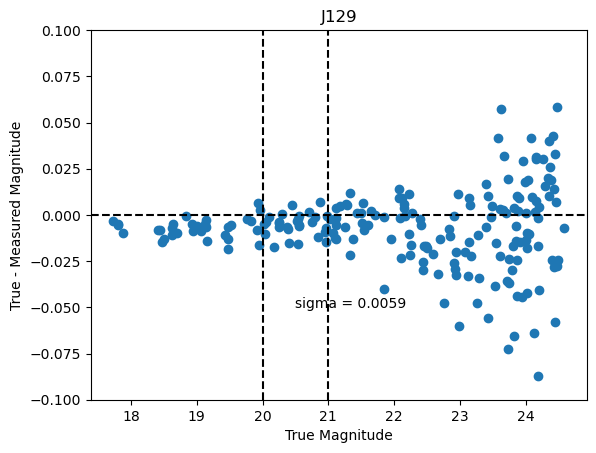

In [11]:
realized_mag = -2.5*np.log10(np.array(realized_flux))
measured_mag = -2.5*np.log10(np.array(measured_flux))
cat = pd.read_csv(roman_path+f'/RomanTDS/truth/{band}/{pointing}/Roman_TDS_index_{band}_{pointing}_{SCA}.txt',\
                                sep="\s+", skiprows = 1,
                                names = ['object_id', 'ra', 'dec', 'x', 'y', 'realized_flux', 'flux', 'mag', 'obj_type'])
cat_star = cat.loc[cat['obj_type'] == 'star']

exptime = image[0].header['EXPTIME']
area_eff = roman.collecting_area
galsim_zp = roman.getBandpasses()[band].zeropoint
truthmag = -2.5*np.log10(cat['flux']) + 2.5*np.log10(exptime*area_eff) + galsim_zp
mag = cat_star['mag']
logflux = -2.5*np.log10(cat_star['flux'])
zpt = np.nanmedian(truthmag - logflux)
#truthmag = truthmag - zpt
# - np.median(truthmag)
#zpt = np.nanmedian(truthmag)
print(zpt)
plt.scatter(realized_mag + zpt, realized_mag - measured_mag)
plt.xlabel('True Magnitude')
plt.ylabel('True - Measured Magnitude')
plt.axvline(20, color = 'k', ls = '--')
plt.axvline(21, color = 'k', ls = '--')
plt.axhline(0, color = 'k', ls = '--')
residuals = realized_mag - measured_mag

residuals = residuals[np.where((realized_mag + zpt < 21) & (realized_mag + zpt > 20))]
print(residuals)
print(np.nanstd(residuals))
plt.text(20.5, -0.05, 'sigma = ' + str(np.round(np.nanstd(residuals),4)))
plt.title(band)
plt.ylim(-0.1,0.1)

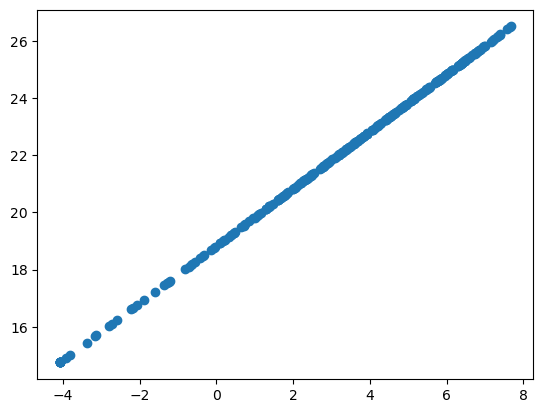

In [22]:
plt.scatter(cat_star['mag'], -2.5*np.log10(cat_star['flux']) + 2.5*np.log10(exptime*area_eff) + galsim_zp)

In [6]:
df = open_parq(10430, path = sn_path)
reals = df.loc[(df.peak_mjd < 62800.0)]
reals = reals.loc[(df.peak_mjd > 62400.0)]
reals = reals.loc[reals.host_mag_F < 999]
#reals = reals.loc[reals.ra > 6.487]
reals = reals.loc[reals.ra > 7]
#reals = reals.loc[reals.ra < 12.51]
reals = reals.loc[reals.ra < 8]
#reals = reals.loc[reals.dec > -46.877]
reals = reals.loc[reals.dec > -45]
#reals = reals.loc[reals.dec < -41.124]
reals = reals.loc[reals.dec < -44]
df = reals
df = df.sort_values('peak_mag_F')
print(list(df.id[4:28]))

[50134575, 50022453, 40018655, 20055347, 50027278, 50144007, 40084671, 50070195, 50071618, 40120913, 50065247, 50061540, 60144043, 50118342, 50119066, 50123776, 50049302, 50010393, 40096456, 50093469, 50099064, 20170506, 30666595, 30201096]


In [29]:
biases = []
stds = []




roman_bandpasses = galsim.roman.getBandpasses()



galwcs2 = None
ra_max = None
###################### BEGIN TEST PARAMETERS #######################
band = 'F184'
npoints = 7
size = 11
testnum = 30 #Total number of images
detim = 15  #Number of images with a supernova

#PSF for when not using the Roman PSF
lam = 1293  # nm
lam_over_diam = 0.11300864172775239   #This is the roman value
airy = galsim.ChromaticOpticalPSF(lam, diam = 2.36, aberrations=galsim.roman.getPSF(1,band, pupil_bin = 1).aberrations)

use_real_images = True
use_roman = True

# These are only for my simulated images # 
check_perfection = False #Don't bother with these five
make_exact = False
avoid_non_linearity = False
deltafcn_profile = False 
single_grid_point = False 


do_xshift = True    #whether to shift the images in the x direction (they will still be centered on the same point, this is just to emulate\
        #Roman taking a series of images at different locations.)
do_rotation = True #whether to rotate the images
noise = 50 #Standard Deviation of noise to add to a simulated image. 
background_level = 300  #mean of the noise to add to the image
if detim == 0:
    supernova = 0
else:
    d = np.linspace(5,20,detim)
    mags = -5 * np.exp(-d/10) + 6
    fluxes = 10**(mags)
    supernova = list(fluxes)   #This is my faux lightcurve, you can edit this if you want to test with a different lightcurve.
#########################################


make_initial_guess = False  #Make an initial guess for the grid point values by averaging over pixels
adaptive_grid = True       #Use my new adaptive grid method rather than a static evenly spaced grid. Bizarrely, this seems to be worse
                            #when just fitting background, but gives better results when fitting for the supernova flux.


fit_background = False     #If true, each image will have a new parameter introduced with it that fits for the background. If False
                            #the background will be subtracted from the images before fitting based on the background level over the whole image.
                            #So far, I've found keeping this to be False is better.

weighting = True #Apply a weighting to the fit. Currently, this is a tophat of radius 4 pix around the SN location. 
                #I've been experimenting with including a Gaussian on top of this.



if single_grid_point:
    assert make_exact
if avoid_non_linearity:
    assert deltafcn_profile
assert detim <= testnum
if type(supernova) == 'list':
    assert len(supernova) == detim

method = 'lsqr'  #Fitting method used at the end of the algorithm. LSQR is by far the best I need to remove this option. 

galsim.roman.roman_psfs._make_aperture.clear() #clear cache

sed = galsim.SED(galsim.LookupTable([100, 2600], [1,1], interpolant='linear'),
                                wave_type='nm', flux_type='fphotons')

###################### END TEST PARAMETERS #######################

#10430
df = open_parq(10430, path = sn_path)
reals = df.loc[(df.peak_mjd < 62800.0)]
reals = reals.loc[(df.peak_mjd > 62400.0)]
reals = reals.loc[reals.host_mag_F < 999]
#reals = reals.loc[reals.ra > 6.487]
reals = reals.loc[reals.ra > 7]
#reals = reals.loc[reals.ra < 12.51]
reals = reals.loc[reals.ra < 8]
#reals = reals.loc[reals.dec > -46.877]
reals = reals.loc[reals.dec > -45]
#reals = reals.loc[reals.dec < -41.124]
reals = reals.loc[reals.dec < -44]
df = reals
df = df.sort_values('peak_mag_F')
for ID in df.id:
    print('starting SN ', ID)

    #Check if the file already exists
    if os.path.exists(f'./residuals_minortweaks_{str(ID)}.csv'):
        print('already completed' + str(ID))
        continue
    

    ################### Finding and Preparing Images Section #########
    psf_matrix = []
    imagelist = []
    wgt_matrix = []
    sn_matrix = []
    cutout_wcs_list = []
    im_wcs_list = []
    gridmade = False

    #This is a catch for when I'm doing my own simulated WCS's
    image = None
    util_ref = None

    #try
    if use_real_images:

        #Find SN Info, find exposures containig it, and load those as images. 
        pqfile = find_parq(ID, sn_path)
        ra, dec, p, s, start, end, peak, galra, galdec = \
            SNID_to_loc(ID, pqfile, date = True, band = band, snpath = sn_path, roman_path = roman_path, host = True)
        snra = ra
        sndec = dec
        start = start[0]
        end = end[0]
        exposures = findAllExposures(ID, ra,dec, peak,start,end, roman_path=roman_path, maxbg = testnum - detim, \
            maxdet = detim, return_list = True, band = band)
        if len(exposures) != testnum:
            print('Not enough exposures')
            continue

        images, cutout_wcs_list, im_wcs_list, err = constructImages(exposures, ra, dec, size = size, \
            background = fit_background, roman_path = roman_path)
        print(images)
        imlist = [images[i*size**2:(i+1)*size**2].reshape(size,size) for i in range(testnum)]

    else:
        #Simulate the images of the SN and galaxy.
        ra, dec = 7.541534306163982, -44.219205940734625
        snra = ra
        sndec = dec
        galra = ra + 1.5e-5
        galdec = dec + 1.5e-5
        print(snra,sndec,galra,galdec, 'SN AND GAL COORDINATES')

        images, im_wcs_list, cutout_wcs_list = simulateImages(testnum,detim,ra,dec,do_xshift,\
            do_rotation,supernova,noise = noise,use_roman=use_roman, size = size)
        imlist = [images[i*size**2:(i+1)*size**2].reshape(size,size) for i in range(testnum)]




    #If not using the adaptive grid, make a grid of points to fit over.
    if not adaptive_grid:
        if single_grid_point:
            ra_grid, dec_grid = [ra], [dec]
        else:
            ra_grid, dec_grid = local_grid(ra,dec, cutout_wcs_list[0], npoints, size = size, spacing = 0.75, spline_grid = False)
            #print('Using gradient grid!!!!!')
            #ra_grid, dec_grid = gradientGrid(images[0*size**2:(0+1)*size**2].reshape(size,size), cutout_wcs_list[0], ra_grid, dec_grid)
        if make_exact:
            if single_grid_point:
                galra = ra_grid[0]
                galdec = dec_grid[0]
            else:
                galra = ra_grid[106]
                galdec = dec_grid[106]

            
        ra_grid = np.array(ra_grid)
        dec_grid = np.array(dec_grid)
        gridmade = True

    #Apply the weighting mask to the images.
    if weighting:
        for i in range(testnum):
            xx, yy = np.meshgrid(np.arange(0,size,1), np.arange(0,size,1))
            xx = xx.flatten()
            yy = yy.flatten()
            rara, decdec = cutout_wcs_list[i].toWorld(xx, yy, units = 'deg')
            dist = np.sqrt((rara - snra)**2 + (decdec - sndec)**2)

            if use_real_images:
                error = err[i*size**2:(i+1)*size**2]

            snx, sny = cutout_wcs_list[i].toImage(snra, sndec, units = 'deg')
            dist = np.sqrt((xx - snx + 1)**2 + (yy - sny + 1)**2)
            #wgt = np.zeros(size**2)
            wgt = np.ones(size**2)
            

            wgt = 5*np.exp(-dist**2/2.5)
            print('using a gaussian weighting of 2.5')
            wgt[np.where(dist > 4)] = 0

            if use_real_images:
                wgt /= error
            wgt = wgt / np.sum(wgt)
            wgt_matrix.append(wgt)

    #If instead making an adaptive grid, use the weighted images to inform where grid points
    #should be placed.
    if adaptive_grid:
        a = images[:size**2].reshape(size,size)
        if weighting:
            wgt = wgt_matrix[0]
        else:
            wgt = np.ones_like(a)
            
        ra_grid, dec_grid = local_grid(ra,dec, cutout_wcs_list[0], \
                npoints, size = size,  spacing = 0.75, image = a, spline_grid = False)
        print('removed wgt when making adaptive grid')
        #*wgt.reshape(size,size)
        gridmade = True

    #ra_grid = np.array([])
    #dec_grid = np.array([])
    #print('manually setting ra and dec grid')

    #Using the images, hazard an initial guess.
    if make_initial_guess and testnum - detim != 0:
        if supernova != 0:
            x0test = generateGuess(imlist[:-detim], cutout_wcs_list, ra_grid, dec_grid)
            x0test = np.concatenate([x0test, np.full(testnum, 3000)], axis = 0)
            print('setting initial guess to 3000')
        else:
            x0test = generateGuess(imlist, cutout_wcs_list, ra_grid, dec_grid)

    else:
        x0test = None

    ############################################### Fitting Section ###############################################



    #Build the backgrounds loop
    for i in range(testnum):
        spinner = ['|', '/', '-', '\\']
        print('Constructing Model ' + str(i) + '   ' + spinner[i%4], end = '\r')
        if use_roman:
            sim_psf = galsim.roman.getPSF(1,band, pupil_bin=8, wcs = cutout_wcs_list[i])
        else:
            sim_psf = airy

        x,y = im_wcs_list[i].toImage(ra,dec, units = 'deg')

        #Build the model for the background using the correct psf and the grid we made in the previous section. 
        if use_real_images:
            util_ref = roman_utils(config_file='./temp_tds.yaml', visit = exposures['Pointing'][i], sca = exposures['SCA'][i])
        else:
            util_ref = roman_utils(config_file='./temp_tds.yaml', visit = 662, sca = 11)
        array = construct_psf_background(ra_grid, dec_grid, cutout_wcs_list[i],\
            x, y, size, roman_bandpasses[band], color=0.61, \
                psf = sim_psf, pixel = pixel, include_photonOps = False, util_ref = util_ref)

        
        if single_grid_point:
            pointx, pointy = cutout_wcs_list[i].toImage(galra, galdec, units = 'deg')
            stamp = galsim.Image(size,size,wcs=cutout_wcs_list[i])
            profile = galsim.DeltaFunction()*sed
            if avoid_non_linearity:
                fluxpoint = 5000
            else:
                fluxpoint = 1
            profile = profile.withFlux(fluxpoint, util_ref.bpass) 
            convolved = galsim.Convolve(profile, sim_psf)
            
            array = convolved.drawImage(util_ref.bpass, method='no_pixel', image = stamp, \
                        wcs = cutout_wcs_list[i], center = (pointx, pointy), \
                            use_true_center = True, add_to_image = False).array.flatten().reshape(-1,1)

        
        if fit_background:
            for j in range(testnum):
                if i == j:
                    bg = np.ones(size**2).reshape(-1,1)
                else:
                    bg = np.zeros(size**2).reshape(-1,1)
                array = np.concatenate([array,bg], axis = 1)
        
        #Add the array of the model points and the background (if using) to the matrix of all components of the model.
        psf_matrix.append(array)

        #The if statements in this section could be written much more elegantly
        if supernova != 0 and i >= testnum - detim:
            snx, sny = cutout_wcs_list[i].toImage(snra, sndec, units = 'deg')
            if use_roman:
                if use_real_images:
                    pointing = exposures['Pointing'][i]
                    SCA = exposures['SCA'][i]
                else:
                    pointing = 662
                    SCA = 11
                array = construct_psf_source(x, y, pointing, SCA, \
                        stampsize = size, x_center = snx, y_center = sny, sed = sed)
            else:
                stamp = galsim.Image(size,size,wcs=cutout_wcs_list[i])
                profile = galsim.DeltaFunction()*sed
                profile = profile.withFlux(1,roman_bandpasses[band]) 
                convolved = galsim.Convolve(profile, sim_psf)
                array = convolved.drawImage(roman_bandpasses[band], method='no_pixel', image = stamp, \
                            wcs = cutout_wcs_list[i], center = (snx, sny), \
                                use_true_center = True, add_to_image = False).array.flatten()
                
            sn_matrix.append(array)


    psf_matrix = np.array(psf_matrix)
    psf_matrix = np.vstack(psf_matrix)

    matrix_list = []
    matrix_list.append(psf_matrix)


    psf_zeros = np.zeros((psf_matrix.shape[0], testnum))

    #Add in the supernova images to the matrix in the appropriate location so that it matches up with the image 
    #it represent. All others should be zero.

    if supernova != 0:
        for i in range(detim):
            psf_zeros[
                (testnum- detim + i) * size * size : (testnum - detim + i + 1) * size * size, (testnum - detim) + i
            ] = sn_matrix[i]
        sn_matrix =psf_zeros
        sn_matrix = np.array(sn_matrix)
        sn_matrix = np.vstack(sn_matrix)
        matrix_list.append(sn_matrix)


    #Combine the background model and the supernova model into one matrix.
    psf_matrix_all = np.hstack(matrix_list)
    psf_matrix = psf_matrix_all

    if weighting:
        wgt_matrix = np.array(wgt_matrix)
        wgt_matrix = np.hstack(wgt_matrix)



    #These if statements can definitely be written more elegantly.
    if not make_initial_guess:
        x0test = np.zeros(psf_matrix.shape[1])

    if fit_background:
        x0test = np.concatenate([x0test, np.zeros(testnum)], axis = 0)

    if not weighting:
        wgt_matrix = np.ones(psf_matrix.shape[1])

    #
    if method == 'lsqr':
        lsqr = sp.linalg.lsqr(psf_matrix*wgt_matrix.reshape(-1,1), images*wgt_matrix, \
                        x0 = x0test, atol = 1e-12, btol = 1e-12, iter_lim=300000, conlim = 1e10)


        '''
        if weighting:
            if fit_background: 
                if make_initial_guess:
                    x0test = np.concatenate([x0test, np.zeros(testnum)], axis = 0)
                    lsqr = sp.linalg.lsqr(psf_matrix*wgt_matrix.reshape(-1,1), images*wgt_matrix, \
                        x0 = x0test, atol = 1e-12, btol = 1e-12, iter_lim=300000, conlim = 1e10)
                else:
                    lsqr = sp.linalg.lsqr(psf_matrix*wgt_matrix.reshape(-1,1), images*wgt_matrix, \
                        atol = 1e-12, btol = 1e-12, iter_lim=300000, conlim = 1e10)
            else:
                lsqr = sp.linalg.lsqr(psf_matrix*wgt_matrix.reshape(-1,1), images*wgt_matrix, \
                    x0 = x0test, atol = 1e-10, btol = 1e-10, iter_lim=300000, conlim = 1e10, show = False)
        else:
            lsqr = sp.linalg.lsqr(psf_matrix, images, x0 = x0test, atol = 1e-7, btol=1e-7, conlim = 1e12, iter_lim=100000)
        '''
        X, istop, itn, r1norm = lsqr[:4]
        print(istop, itn, r1norm)

    #Don't use this method. It's not very good.
    if method == 'lasso':
        clf = linear_model.Lasso(alpha = 1e-15, fit_intercept = False, tol = 1e-40, positive = False)
        clf.fit(psf_matrix, images)
        X = clf.coef_
    if method == 'poslasso':
        clf = linear_model.Lasso(alpha = 1e-10, fit_intercept = False, tol = 1e-40, positive = True)
        clf.fit(psf_matrix, images)
        X = clf.coef_

    #Using the values found in the fit, construct the model images.
    pred = X*psf_matrix
    sumimages = np.sum(pred, axis = 1)
    res = sumimages - images
    biases.append(np.mean(res))
    stds.append(np.std(res))


    if check_perfection:
        if avoid_non_linearity:
            f = 1
        else:
            f = 5000
        if single_grid_point:
            X[0] = f
        else:
            X = np.zeros_like(X)
            X[106] = f

    supernova = np.array(exposures['realized flux'][np.where(exposures['DETECTED'])])
    magresiduals = -2.5*np.log10(X[-detim:])+2.5*np.log10(np.array(supernova))
    fluxresiduals = X[-detim:] - np.array(supernova)
    host_sep = df['host_sn_sep'][df['id'] == ID].values[0]
    print('Host Sep:', host_sep)
    host_mag = df['host_mag_F'][df['id'] == ID].values[0]
    #Make these into a pandas dataframe
    residuals = pd.DataFrame({'id':ID, 'sn_flux':np.array(supernova), 'host_sn_sep':host_sep,\
    'host_mag_F':host_mag, 'mag_residual':magresiduals, 'flux_residual':fluxresiduals})
    
    residuals.to_csv(f'residuals_minortweaks_{str(ID)}.csv')
    print('Saved Residuals for ' + str(ID))

    '''
    except Exception as e:
        print(e)
        print('Failed on' + str(ID))
        continue
    '''

    ### end fitting loop ###


    ### end fitting loop ###


starting SN  40134404


KeyboardInterrupt: 

In [49]:
#Return just the detected exposures
supernova = np.array(exposures['realized flux'][np.where(exposures['DETECTED'])])
magresiduals = -2.5*np.log10(X[-detim:])+2.5*np.log10(np.array(supernova))
fluxresiduals = X[-detim:] - np.array(supernova)
host_sep = df['host_sn_sep'][df['id'] == ID].values[0]
print('Host Sep:', host_sep)
host_mag = df['host_mag_F'][df['id'] == ID].values[0]
#Make these into a pandas dataframe
residuals = pd.DataFrame({'id':ID, 'sn_flux':np.array(supernova), 'host_sn_sep':host_sep,\
     'host_mag_F':host_mag, 'mag_residual':magresiduals, 'flux_residual':fluxresiduals})

residuals

Host Sep: 0.020618236


,id,sn_flux,host_sn_sep,host_mag_F,mag_residual,flux_residual
0,90000055,3508.0,0.020618,28.229,0.104323,-321.378284
1,90000055,3443.0,0.020618,28.229,-0.068073,222.777420
2,90000055,3569.0,0.020618,28.229,0.000664,-2.180691
3,90000055,3476.0,0.020618,28.229,-0.116596,394.063481
4,90000055,3467.0,0.020618,28.229,0.061271,-190.234139
5,90000055,3258.0,0.020618,28.229,-0.043183,132.193175
6,90000055,3427.0,0.020618,28.229,-0.186073,640.648247
7,90000055,3610.0,0.020618,28.229,0.087854,-280.602071
8,90000055,3175.0,0.020618,28.229,0.012828,-37.292606
9,90000055,3303.0,0.020618,28.229,-0.133491,432.123202


----
nogradient
----
nogradient
----
30004601
6.618256335037983
0.1680917375140197
0.013897501151063212
----
30004426
9.121322250825521
0.6003713912740921
-0.7835427557938329
----
70000282
4.135454604936089
0.051372479245389915
0.004860461936876466
----
90000055
5.176941723492943
0.09510463111026579
-0.044307248655858555
----
30002792
7.030661954614625
0.2835538456834761
-0.07526745754620905
----
nogradient
----
nogradient
----
30014170
6.0357860770941825
0.18654044301140024
0.050422564554835715
----
nogradient
----
30014117
7.529781629063138
0.6959046990484725
0.04588029587155838
----
30004345
8.638955927214587
0.9730855212019259
0.3087105069595497
----
nogradient
----
30008685
8.655263115852025
0.5744842284618129
-0.16671269749320503
----
30011782
8.534919320815629
0.7909216277664947
-0.5028110971694327
----
nogradient
----
nogradient
----
nogradient
----
30002725
7.522646571619286
0.5470654688925187
-0.04367269257896833
----
30000890
5.058681855577477
0.061875161279433696
0.00595819

(4.0, 6.0)

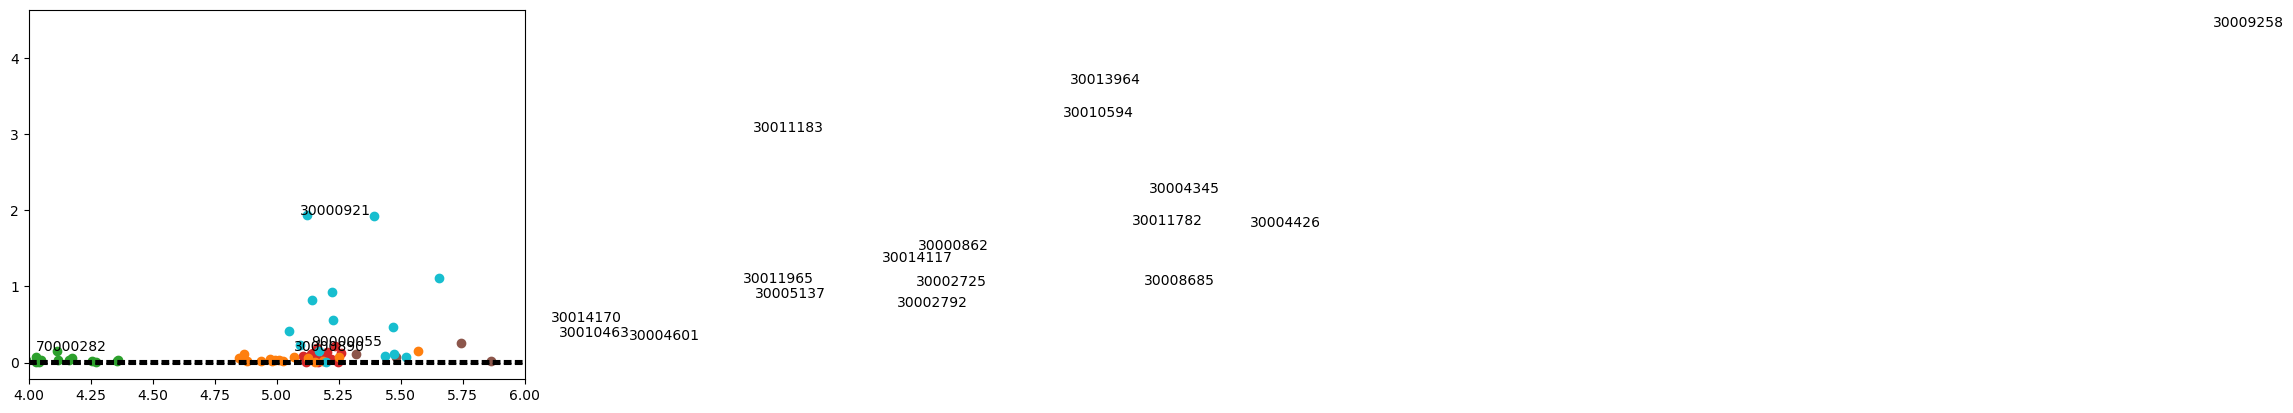

In [50]:
#Cycle through the files in this directory and plot the residuals

files = os.listdir()

mags = []
residuals = []
for f in files:
    if 'residuals' in f:
        print('----')
        if 'nogradient' in f:
            color = 'b'
            print('nogradient')
            continue

        else:
            color = 'r'
        residuals = pd.read_csv(f)

        plt.scatter(14 - 2.5*np.log10(residuals['sn_flux']), np.abs(residuals['mag_residual']), marker = 'o', label = str(residuals['id'][0]))
        plt.text(14 - 2.5*np.log10(residuals['sn_flux'][0]), np.max(np.abs(residuals['mag_residual'])), str(residuals['id'][0]))
        print(residuals['id'][0])
        print(np.mean(14 - 2.5*np.log10(residuals['sn_flux'])))
        print(np.std(residuals['mag_residual']))
        print(np.mean(residuals['mag_residual']))

#plt.legend()
plt.axhline(0, color = 'k', ls = '--')
plt.axhline(0.02, color = 'k', ls = '--')
plt.axhline(-0.02, color = 'k', ls = '--')
plt.xlim(4,6)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


nan nan
-0.036459645358412604 0.5454446413531584
(3, 705)
(681,)


/tmp/ipykernel_842150/2102318227.py:42: RuntimeWarning: Mean of empty slice
  print(np.nanmean(gradresiduals), np.nanstd(gradresiduals))
/hpc/home/cfm37/miniconda3/envs/ColeRoman/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/hpc/home/cfm37/miniconda3/envs/ColeRoman/lib/python3.10/site-packages/scipy/stats/_binned_statistic.py:694: RuntimeWarning: Mean of empty slice
  stat = stat_func(np.array(bin_map[i]))
/hpc/home/cfm37/miniconda3/envs/ColeRoman/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


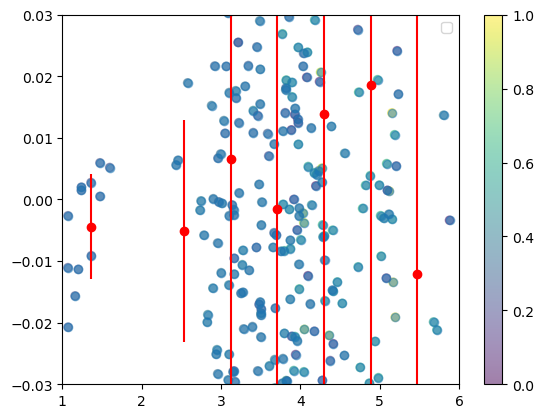

In [6]:
files = os.listdir()

gradresiduals = []
nogradresiduals = []
snflux = []
hostmag = []
hostsep = []
for f in files:
    if 'nogradient' in f:
        #or '.csv' not in f:
        residuals = pd.read_csv(f)
        nogradresiduals.extend(residuals['mag_residual'])
        snflux.extend(residuals['sn_flux'])
        hostmag.extend(residuals['host_mag_F'])
        hostsep.extend(residuals['host_sn_sep'])
    '''
        continue

    residuals = pd.read_csv(f)

    ID = f.split('_')[1].split('.')[0]

    try:
       residuals2 = pd.read_csv(f'residuals_nogradient_{ID}.csv')
    except:
        continue
    #print(residuals.columns)
    #plt.scatter(np.abs(residuals['mag_residual']), np.abs(residuals2['mag_residual']), marker = 'o', label = str(residuals['id'][0]))

    snflux.extend(residuals['sn_flux'])
    gradresiduals.extend(residuals['mag_residual'])
    nogradresiduals.extend(residuals2['mag_residual'])
    '''

bins = np.linspace(-1,1,50)
#plt.hist(gradresiduals, bins = bins, alpha = 0.5, label = 'With Gradient')
#plt.hist(nogradresiduals, bins = bins, alpha = 0.5, label = 'Without Gradient')
plt.legend()
mags = 14 - 2.5*np.log10(snflux)
plt.scatter(14-2.5*np.log10(snflux), nogradresiduals, marker = 'o', c= hostmag, alpha = 0.5)
plt.scatter(mags, nogradresiduals, marker = 'o', alpha = 0.5)
print(np.nanmean(gradresiduals), np.nanstd(gradresiduals))
print(np.nanmean(nogradresiduals), np.nanstd(nogradresiduals))



means, bins, _ = scipy.stats.binned_statistic(mags, nogradresiduals, statistic = np.nanmean, bins = 20)
stds, bins, _ = scipy.stats.binned_statistic(mags, nogradresiduals, statistic = np.nanstd, bins = 20)

bincenters = 0.5*(bins[1:]+bins[:-1])
plt.errorbar(bincenters, means, yerr = stds, fmt = 'o', color = 'r')
plt.xlim(1,6)
plt.ylim(-0.03,0.03)
plt.colorbar()
#plt.yscale('symlog')
#plt.xscale('log')


#Scipy linear regression
from scipy import stats
x = np.array([mags, hostmag, hostsep])
print(np.shape(x))
y = np.array(nogradresiduals)

#remove rows with nans from x and y
mask = ~np.isnan(y)
x = x[:,mask].T
y = y[mask]

print(np.shape(y))


from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)

In [30]:
df = open_parq(10430, path = sn_path)
reals = df.loc[(df.peak_mjd < 62800.0)]
reals = reals.loc[(df.peak_mjd > 62400.0)]
reals = reals.loc[reals.host_mag_F < 999]
#reals = reals.loc[reals.ra > 6.487]
reals = reals.loc[reals.ra > 7]
#reals = reals.loc[reals.ra < 12.51]
reals = reals.loc[reals.ra < 8]
#reals = reals.loc[reals.dec > -46.877]
reals = reals.loc[reals.dec > -45]
#reals = reals.loc[reals.dec < -41.124]
reals = reals.loc[reals.dec < -44]
df = reals
print(df)
df = df.sort_values('host_mag_F', ascending=False)
maxloc = np.argmax(5*df['host_sn_sep'] + df['host_mag_F'] - df['peak_mag_F'])
print(df['id'].iloc[maxloc])

              id        ra        dec         host_id  gentype  \
1323    90000055  7.194761 -44.424092  10430200762122       58   
1339    70000282  7.599331 -44.434032  10430200669962       40   
1409    30000461  7.291559 -44.977996  10430100433335       32   
1419    30000714  7.376610 -44.495922  10430000492081       32   
1424    30000862  7.462903 -44.401654  10430100967073       32   
...          ...       ...        ...             ...      ...   
64726  110001506  7.088955 -44.424098  10430000449490       42   
64734  110001655  7.787660 -44.982086  10430000038874       42   
64765  110002167  7.742574 -44.728629  10430000296715       42   
64779  110002514  7.394897 -44.683098  10430100750249       42   
64788  110002642  7.748533 -44.343073  10430100130320       42   

                            model_name  start_mjd  end_mjd   z_CMB  mw_EBV  \
1323   NON1ASED.PISN-STELLA-HYDROGENIC    62456.0  63267.0  2.3147     0.0   
1339             NON1ASED.SLSN-I-BBFIT    62432.0  

In [ ]:
testimage = images[0*size**2:(0+1)*size**2].reshape(size,size)
stampsize = 11
not_done = True
model = np.zeros_like(testimage)
residual = testimage - model
psf_array = np.zeros((0,stampsize**2))
xes = []
ys = []
currentX = None
for i in range(5):
    #Place a psf grid model point at the point of maximum residual
    
    maxres = np.argsort(residual.flatten())[:3]
    print(maxres)
    #get the x and y of the max residual
    xres = maxres % size + np.random.uniform(-0.5,0.5,3) + 1
    yres = maxres // size + np.random.uniform(-0.5,0.5,3) + 1
    xes.append(xres)
    ys.append(yres)
    print('Max Residual', xres, yres)
    plt.subplot(1,2,1)
    plt.imshow(residual, origin = 'lower')
    #add a psf point there
    wcs = cutout_wcs_list[0]
    ra, dec = wcs.toWorld(xres, yres, units = 'deg')
    print(ra, dec)

    util_ref = roman_utils(config_file='./temp_tds.yaml', visit =exposures['Pointing'][0] , sca = exposures['SCA'][0])
    bpass= util_ref.bpass
    plt.subplot(1,2,2)
    psf = construct_psf_background(ra, dec, wcs, 2040,2040, stampsize, bpass, util_ref = util_ref)
    psf_array = np.append(psf, psf_array)
    psf_array = psf_array.reshape(stampsize**2, -1)
    #plt.imshow(psf.reshape(stampsize,stampsize), origin = 'lower')
    print(psf_array.shape)
    if currentX is None:
        initial_guess = np.zeros(psf_array.shape[1])
    else:
        initial_guess = np.concatenate([currentX,[0]])
        print(initial_guess)
    lsqr = sp.linalg.lsqr(np.array(psf_array), testimage.flatten(), atol = 1e-12, btol = 1e-12, iter_lim=300000, conlim = 1e10, x0 = initial_guess)
    print(lsqr[0])
    model = lsqr[0]*psf
    currentX = lsqr[0]
    model = np.sum(model, axis = 1)
    plt.imshow(testimage.reshape(stampsize,stampsize) - model.reshape(stampsize,stampsize), origin = 'lower')
    plt.scatter(np.array(xes) - 1, np.array(ys) - 1)
    plt.colorbar()
    plt.show()